<a href="https://colab.research.google.com/github/AndreiAf02/Cholera/blob/main/Cholera_Extension_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.stats as stats
import pandas as pd
import pymc as pm
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Cholera/main/'
data_all = pd.read_csv(path_to_data + "Chol_Africa_Cumul.csv", sep=",", header=0)
data_all

,Date,Day,Burundi,Comoros,Ethiopia,Kenya,Malawi,Mozambique,Somalia,Sudan,Zambia,Zimbabwe
0,2023-01-06,1,12.0,NaN,NaN,347.0,3055.0,NaN,NaN,NaN,NaN,NaN
1,2023-01-13,8,63.0,NaN,NaN,NaN,7131.0,1014.0,NaN,NaN,NaN,NaN
2,2023-01-21,16,114.0,NaN,NaN,980.0,12046.0,1776.0,NaN,NaN,NaN,NaN
3,2023-01-27,22,NaN,NaN,NaN,1336.0,15746.0,2256.0,703.0,NaN,11.0,NaN
4,2023-02-03,29,NaN,NaN,NaN,1541.0,20172.0,2602.0,NaN,NaN,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-04-14,465,1317.0,787.0,34662.0,NaN,42594.0,43803.0,NaN,NaN,21707.0,28840.0
62,2024-04-20,471,1322.0,1769.0,NaN,NaN,42607.0,44038.0,21964.0,NaN,21884.0,29429.0
63,2024-04-28,479,1331.0,2498.0,37302.0,NaN,42617.0,44238.0,22699.0,10295.0,22052.0,30179.0
64,2024-05-05,486,1344.0,3864.0,38071.0,NaN,42619.0,44352.0,23410.0,NaN,22107.0,30572.0


Text(0.5, 1.0, 'Burundi')

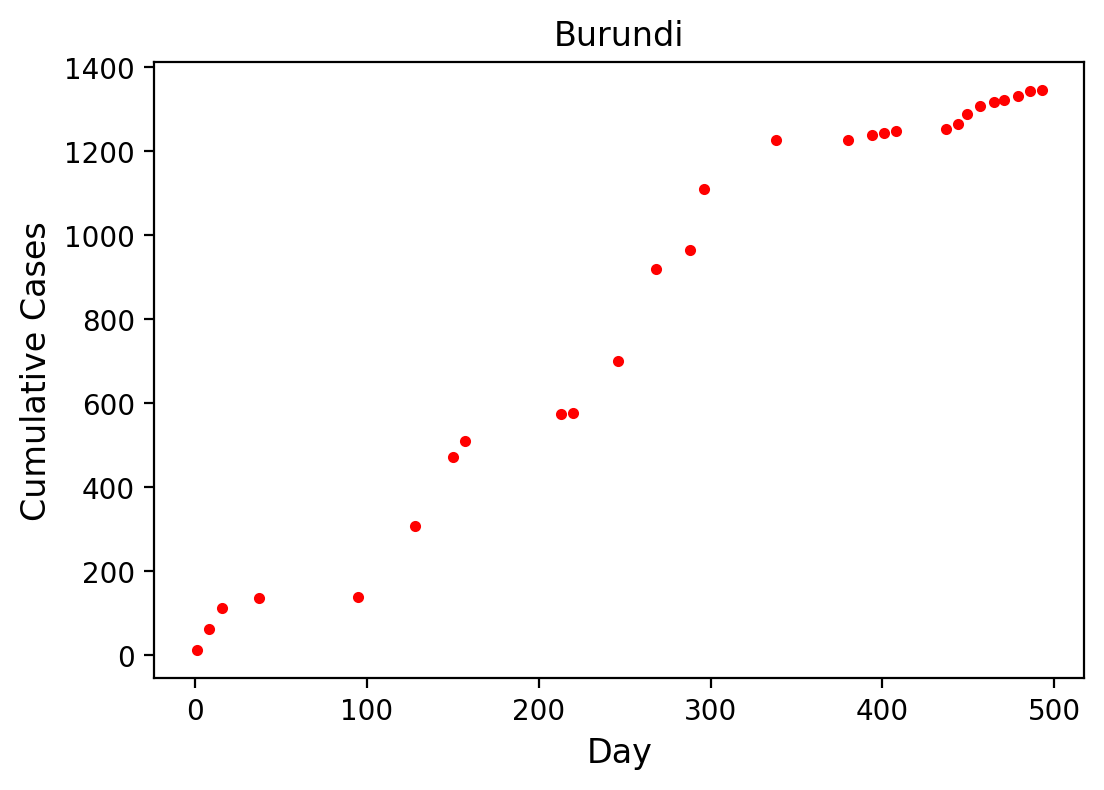

In [3]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Burundi'], 'r.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Burundi')

Text(0.5, 1.0, 'Comoros')

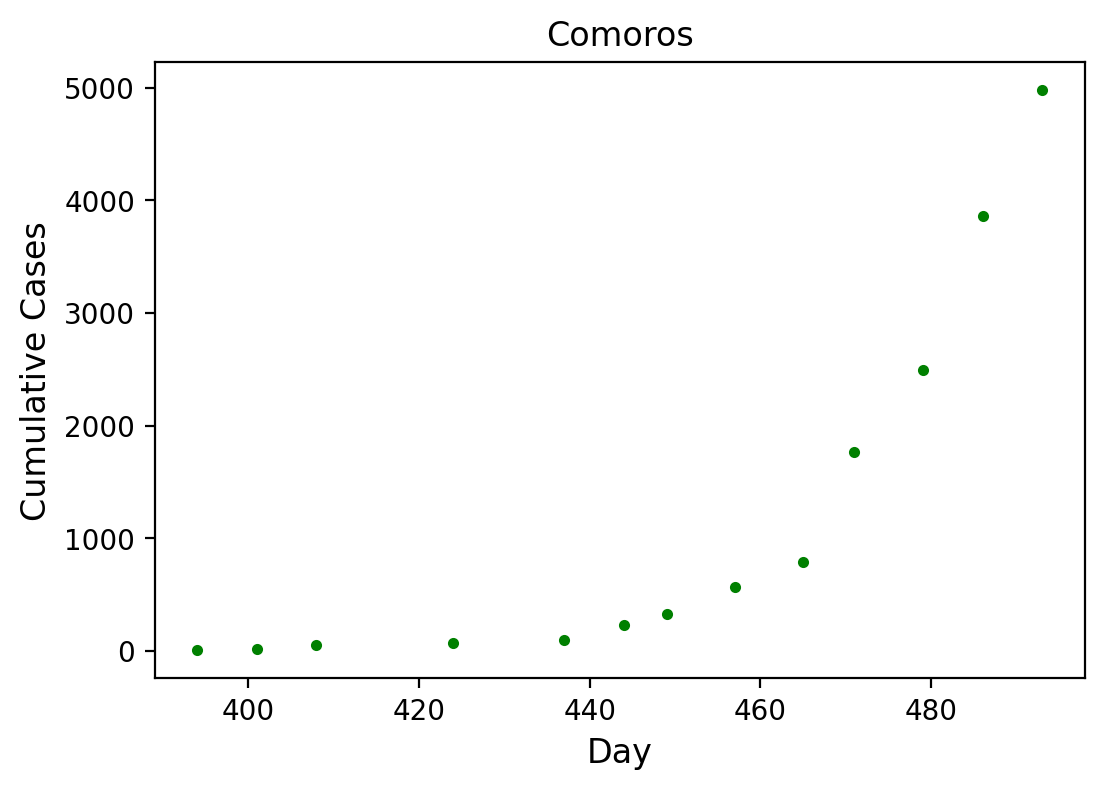

In [4]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Comoros'], 'g.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Comoros')

Text(0.5, 1.0, 'Ethiopia')

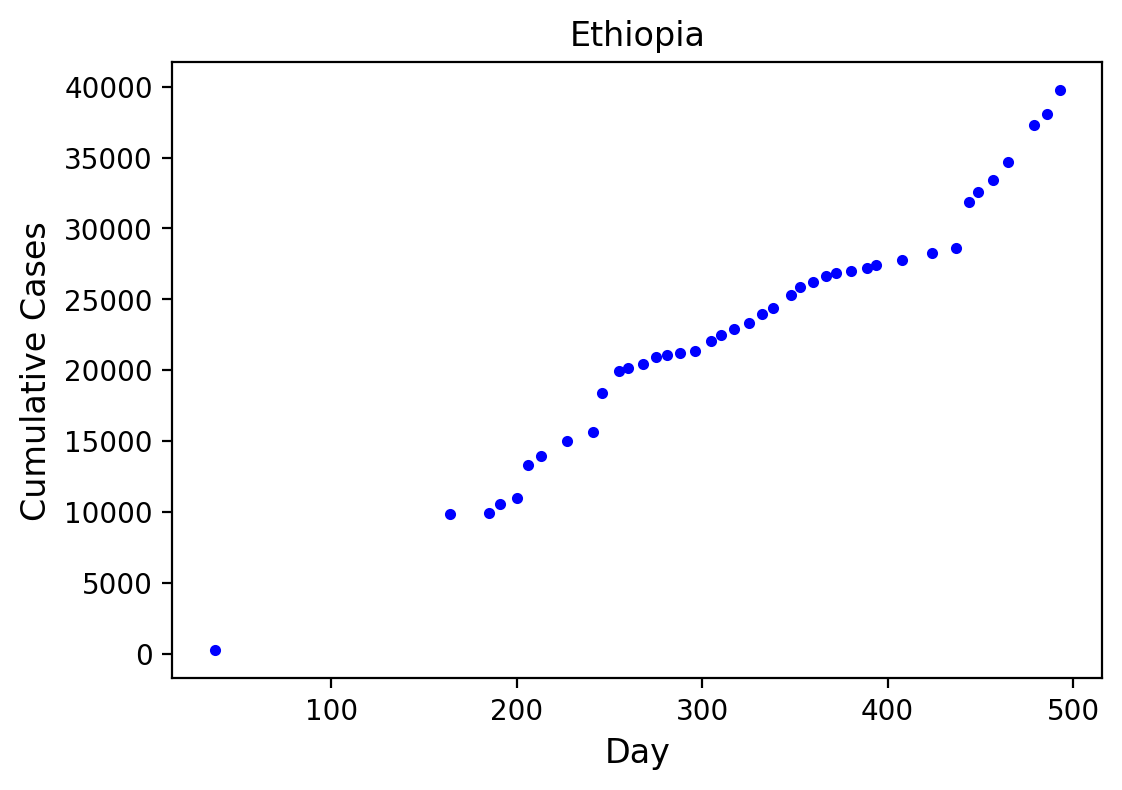

In [5]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Ethiopia'], 'b.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Ethiopia')

Text(0.5, 1.0, 'Kenya')

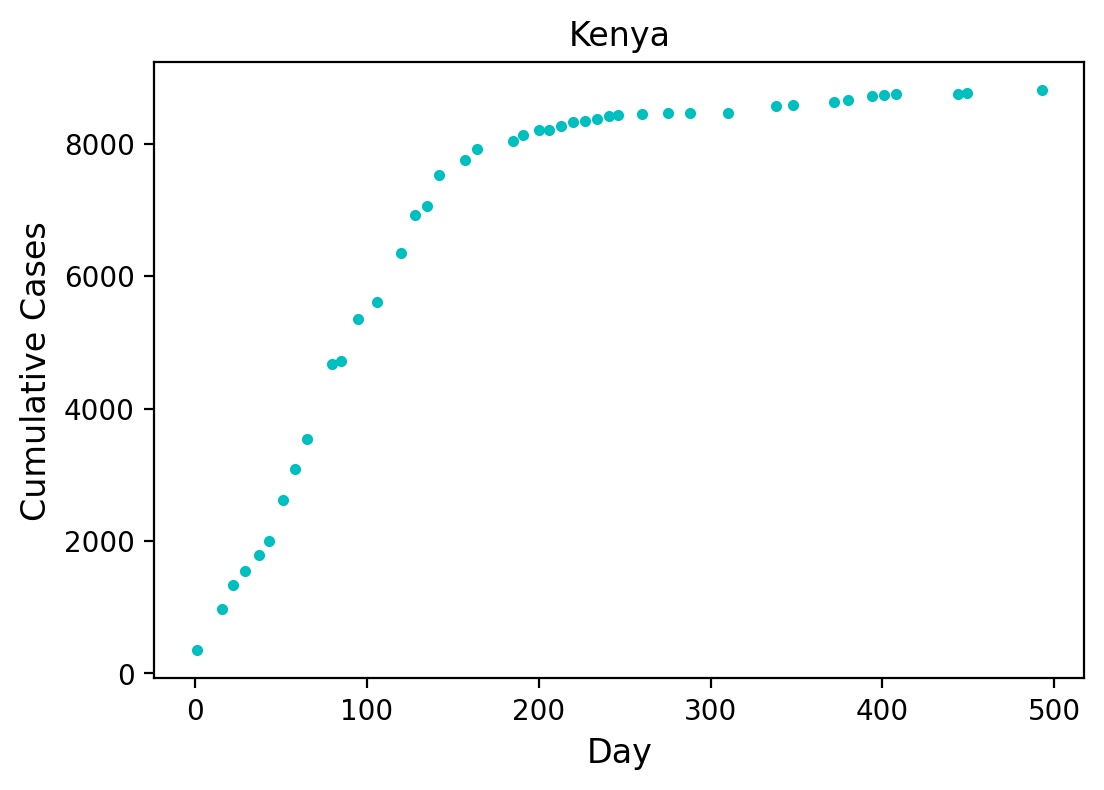

In [6]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Kenya'], 'c.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Kenya')

Text(0.5, 1.0, 'Malawi')

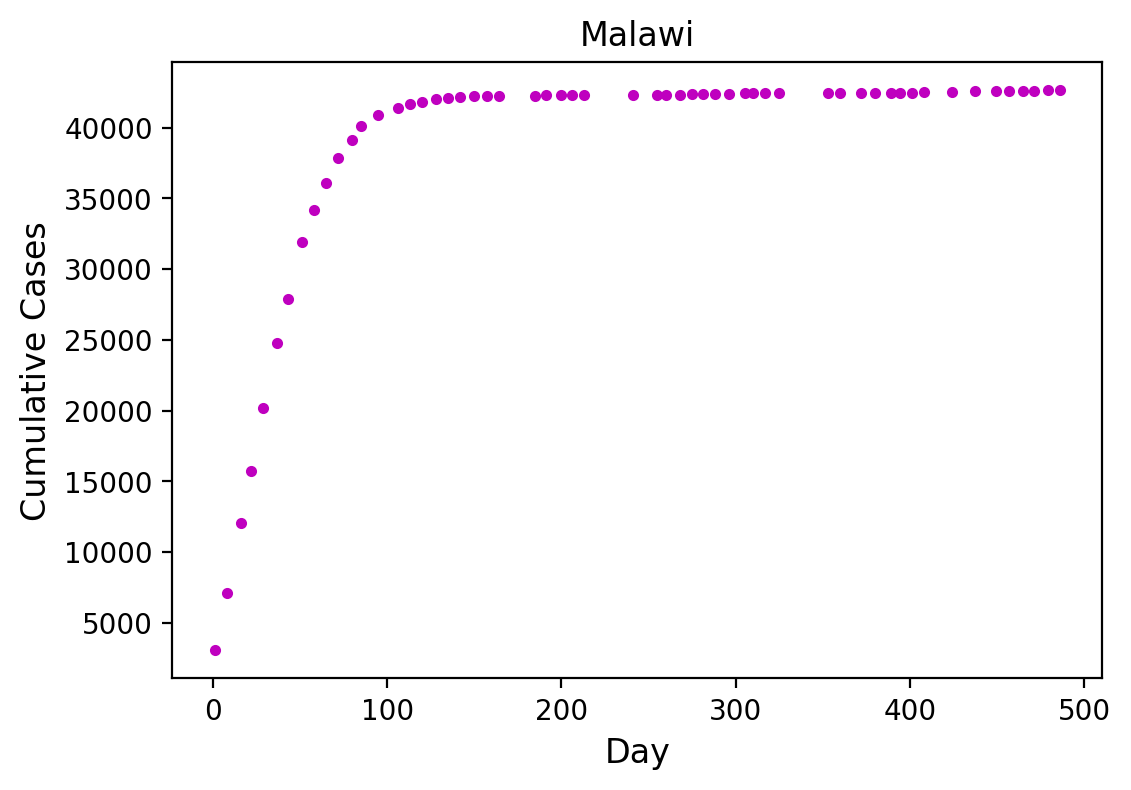

In [7]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Malawi'], 'm.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Malawi')

Text(0.5, 1.0, 'Mozambique')

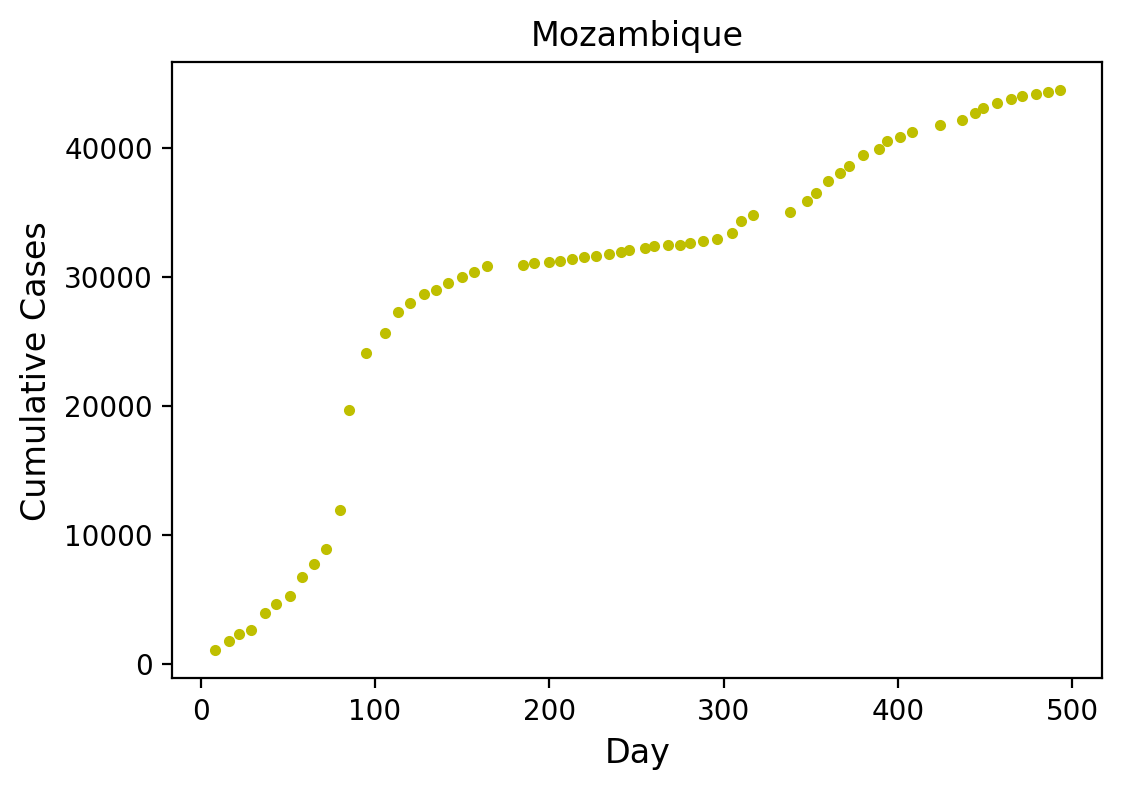

In [8]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Mozambique'], 'y.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Mozambique')

Text(0.5, 1.0, 'Somalia')

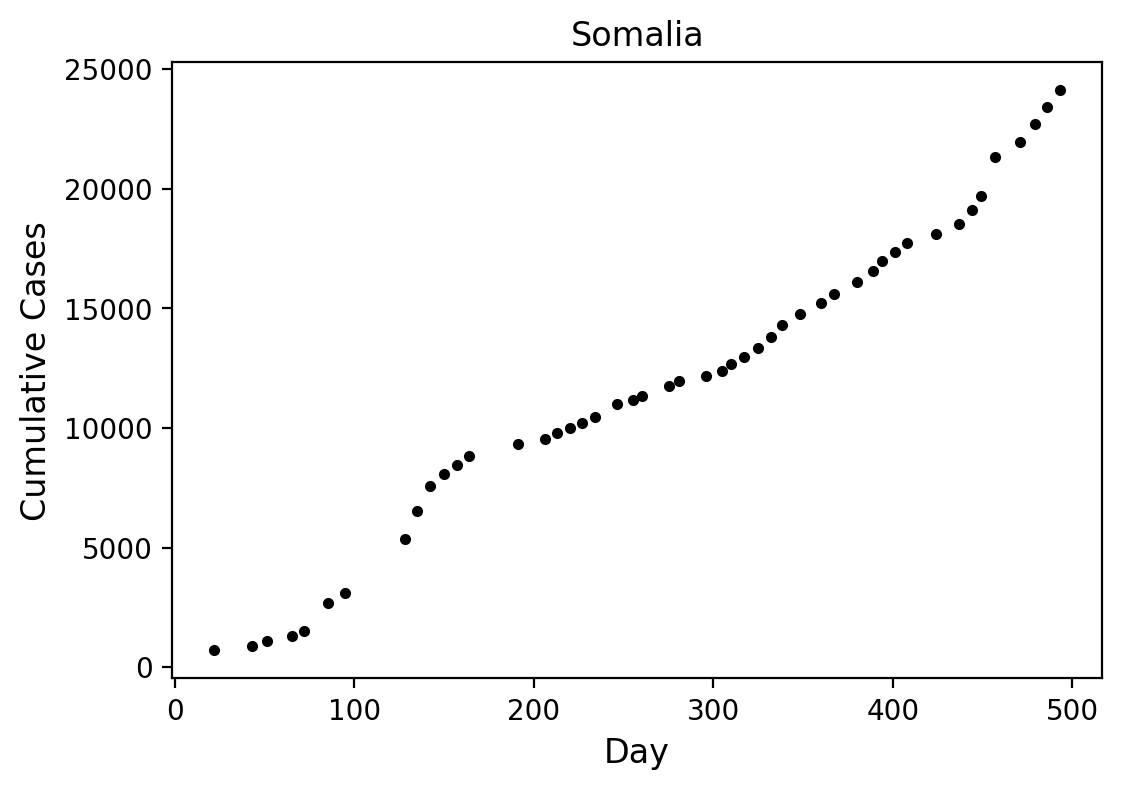

In [9]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Somalia'], 'k.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Somalia')

Text(0.5, 1.0, 'Sudan')

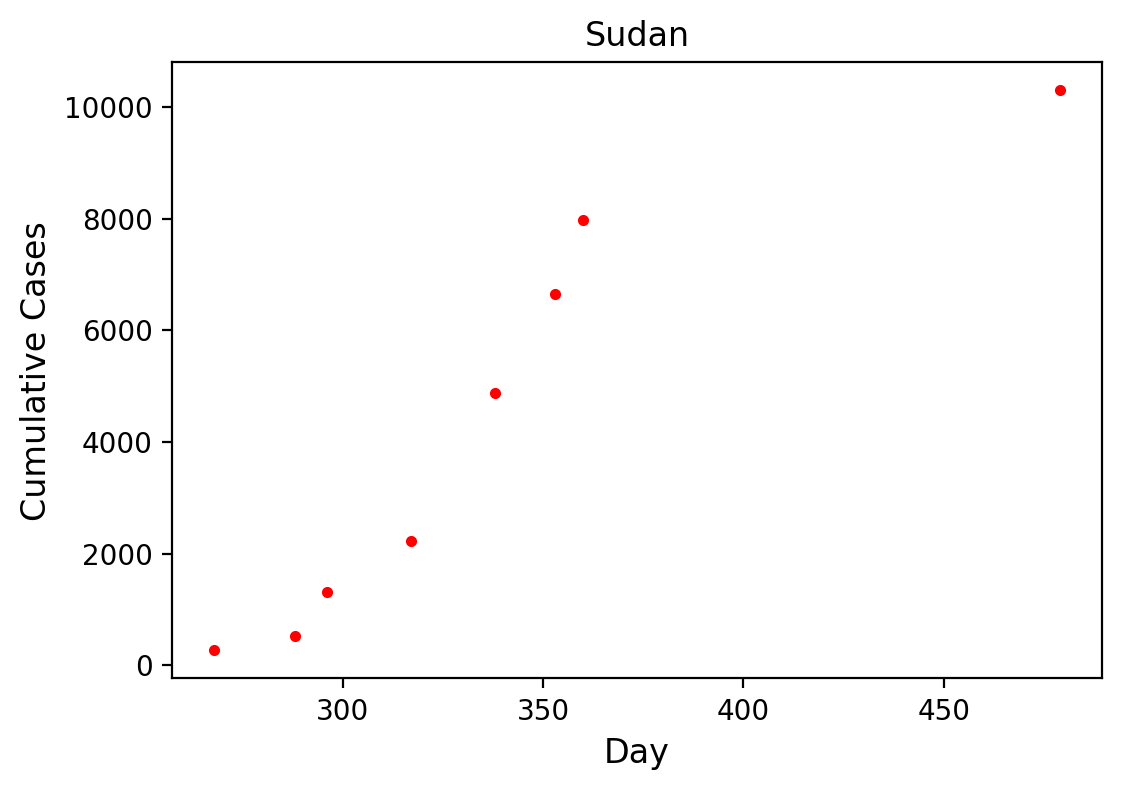

In [10]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Sudan'], 'r.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Sudan')

Text(0.5, 1.0, 'Zambia')

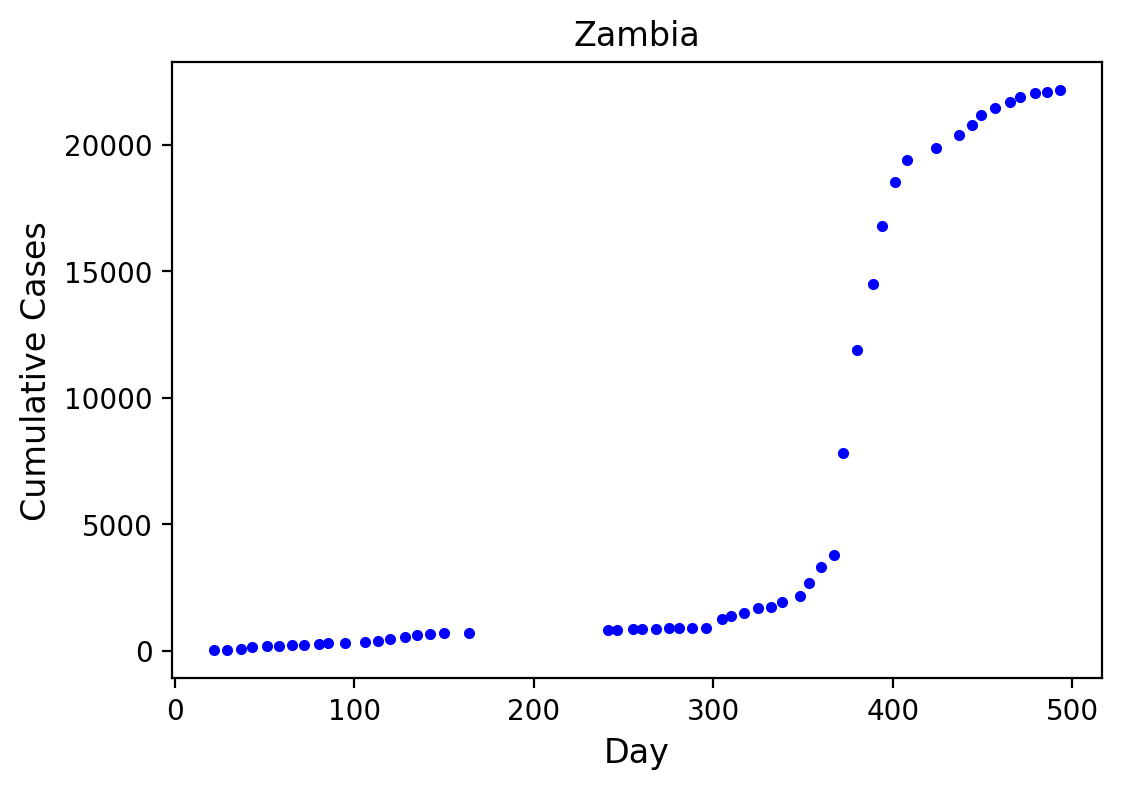

In [11]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Zambia'], 'b.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Zambia')

Text(0.5, 1.0, 'Zimbabwe')

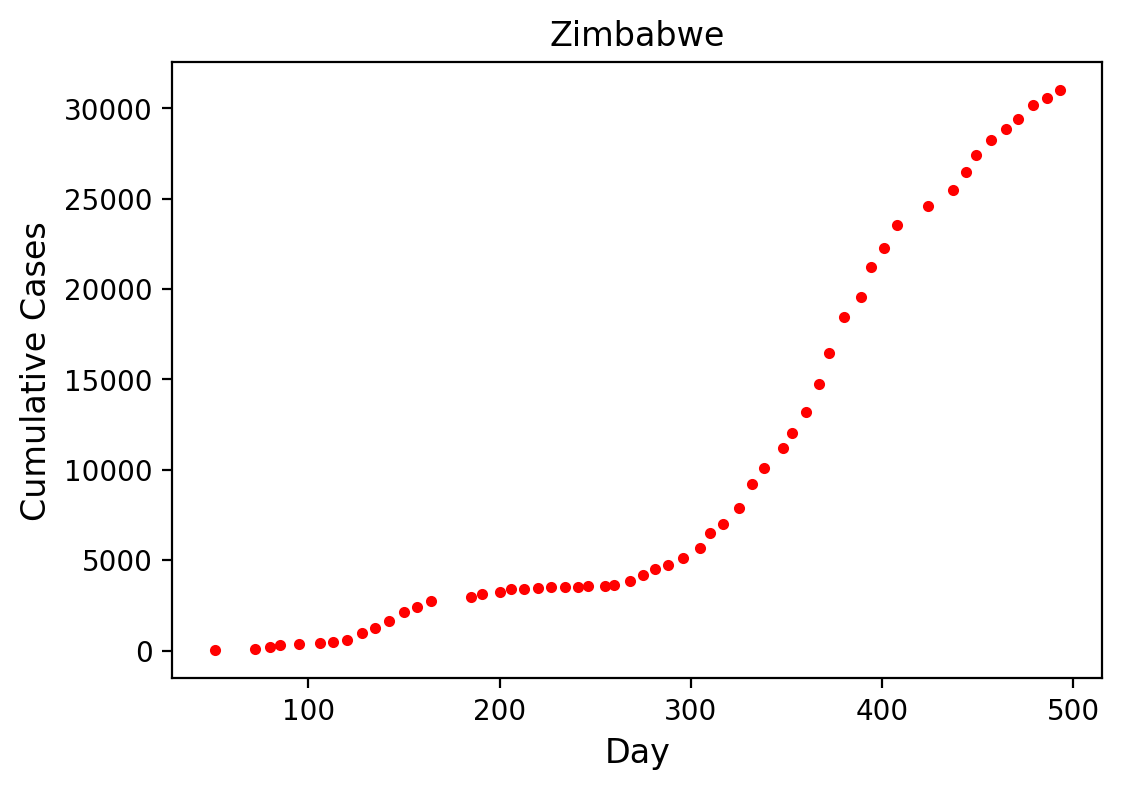

In [12]:
figure(1, [6, 4])
plot(data_all['Day'], data_all['Zimbabwe'], 'r.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Zimbabwe')

##Haiti:

In [13]:
data_all_haiti= pd.read_csv(path_to_data + "Cholera_Haiti.csv", sep=",", header=0)
data_all_haiti['PNAS']=data_all_haiti['PNAS']*1000

data_all_haiti

,Date,PNAS,PAHO
0,1,12000.0,1
1,2,7800.0,3
2,3,15600.0,4
3,4,15050.0,13
4,5,15300.0,35
...,...,...,...
128,129,NaN,130
129,130,NaN,142
130,131,NaN,156
131,132,NaN,165


In [14]:
data_all_haiti['PNAS 2']=np.cumsum(data_all_haiti['PNAS'])

data_all_haiti['PAHO 2']=np.cumsum(data_all_haiti['PAHO'])

data_all_haiti

# np.cumsum(data_all_haiti['PNAS 2'])

# for i in range(1,len(data_all_haiti)):
#   data_all_haiti['PNAS 2'][i]=data_all_haiti['PNAS 2'][i-1]+data_all_haiti['PNAS'][i]

,Date,PNAS,PAHO,PNAS 2,PAHO 2
0,1,12000.0,1,12000.0,1
1,2,7800.0,3,19800.0,4
2,3,15600.0,4,35400.0,8
3,4,15050.0,13,50450.0,21
4,5,15300.0,35,65750.0,56
...,...,...,...,...,...
128,129,NaN,130,NaN,31112
129,130,NaN,142,NaN,31254
130,131,NaN,156,NaN,31410
131,132,NaN,165,NaN,31575


In [15]:
data_haiti_1 = data_all_haiti.drop(columns=['PAHO', 'PAHO 2'])
data_haiti_1 = data_haiti_1[data_haiti_1['PNAS 2'].notnull()]
# data_haiti_1



data_haiti_2 = data_all_haiti.drop(columns=['PNAS', 'PNAS 2', 'PAHO'])

for i in range(len(data_haiti_2)):
  if data_haiti_2['Date'][i] % 7 ==0:
    data_haiti_2['Date'][i] = data_haiti_2['Date'][i]/7
    data_haiti_2['PAHO 2'][i] = data_haiti_2['PAHO 2'][i]
  else:
    data_haiti_2['Date'][i] = None
    data_haiti_2['PAHO 2'][i] = None

data_haiti_2 = data_haiti_2[data_haiti_2['PAHO 2'].notnull()]
data_haiti_2.reset_index(drop=True, inplace=True)
print(data_haiti_2)


    Date   PAHO 2
0    1.0    158.0
1    2.0   1247.0
2    3.0   2424.0
3    4.0   4130.0
4    5.0   6741.0
5    6.0   9494.0
6    7.0  12142.0
7    8.0  14685.0
8    9.0  17142.0
9   10.0  19229.0
10  11.0  20649.0
11  12.0  22020.0
12  13.0  23367.0
13  14.0  24876.0
14  15.0  26524.0
15  16.0  28199.0
16  17.0  29484.0
17  18.0  30719.0
18  19.0  31734.0


<ipython-input-15-963afd60998e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_haiti_2['PAHO 2'][i] = None


Text(0.5, 1.0, 'Haiti (PNAS)')

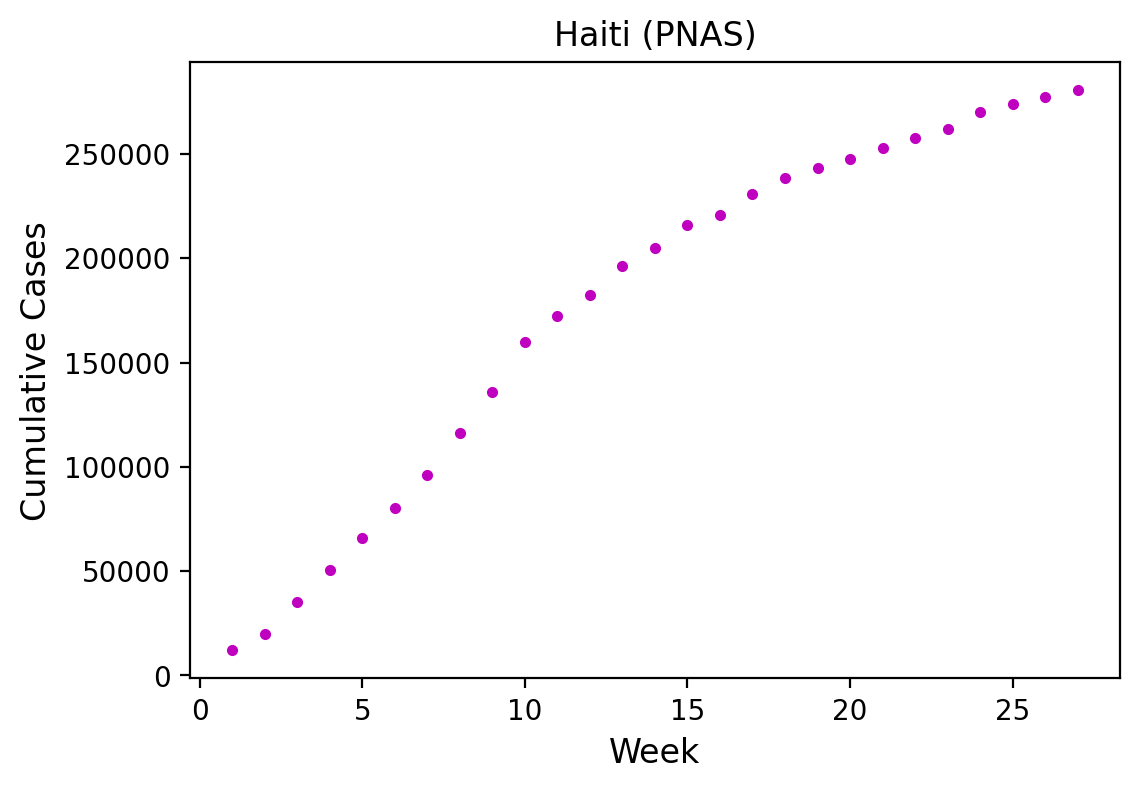

In [16]:
figure(1, [6, 4])
plot(data_haiti_1['Date'], data_haiti_1['PNAS 2'], 'm.')
xlabel('Week', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Haiti (PNAS)')

Text(0.5, 1.0, 'Haiti (PAHO)')

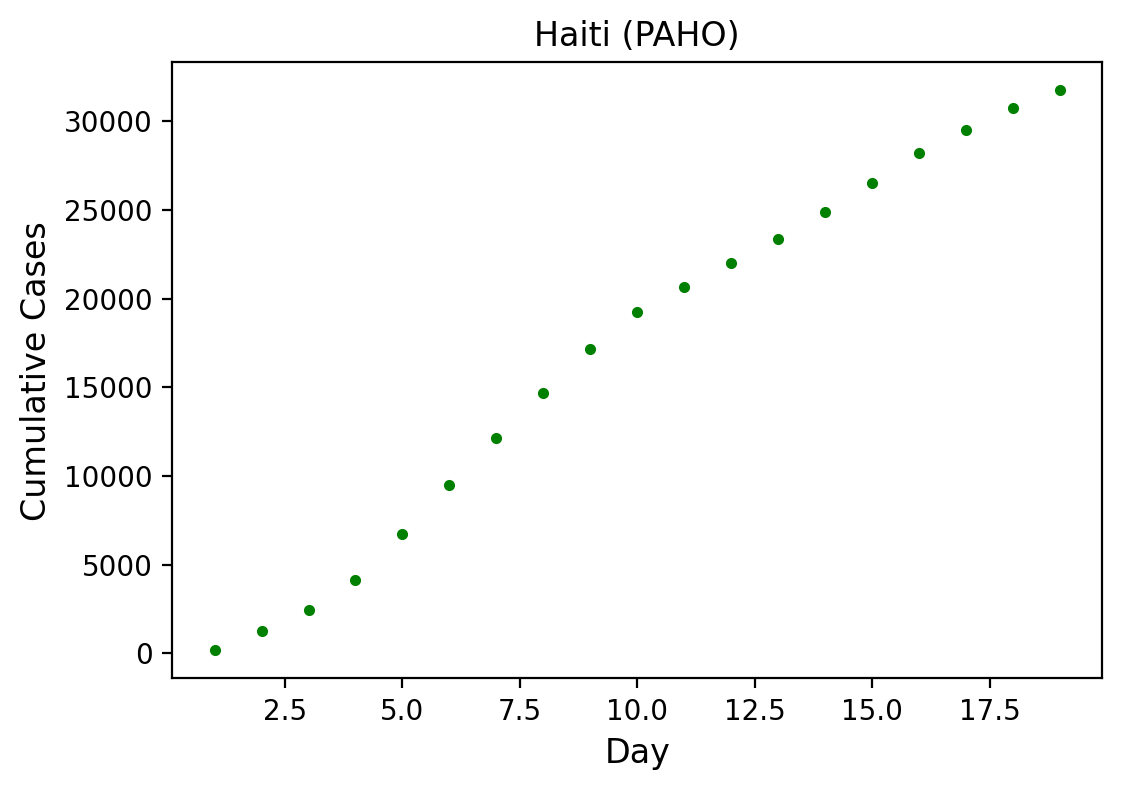

In [17]:
figure(1, [6, 4])
plot(data_haiti_2['Date'], data_haiti_2['PAHO 2'], 'g.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases', fontsize=12);
title('Haiti (PAHO)')

##Old Model Fit:

I(t)= 346751.493072078
B(t)= 4365672.255115066
SumSquares= 1666414537.6635065


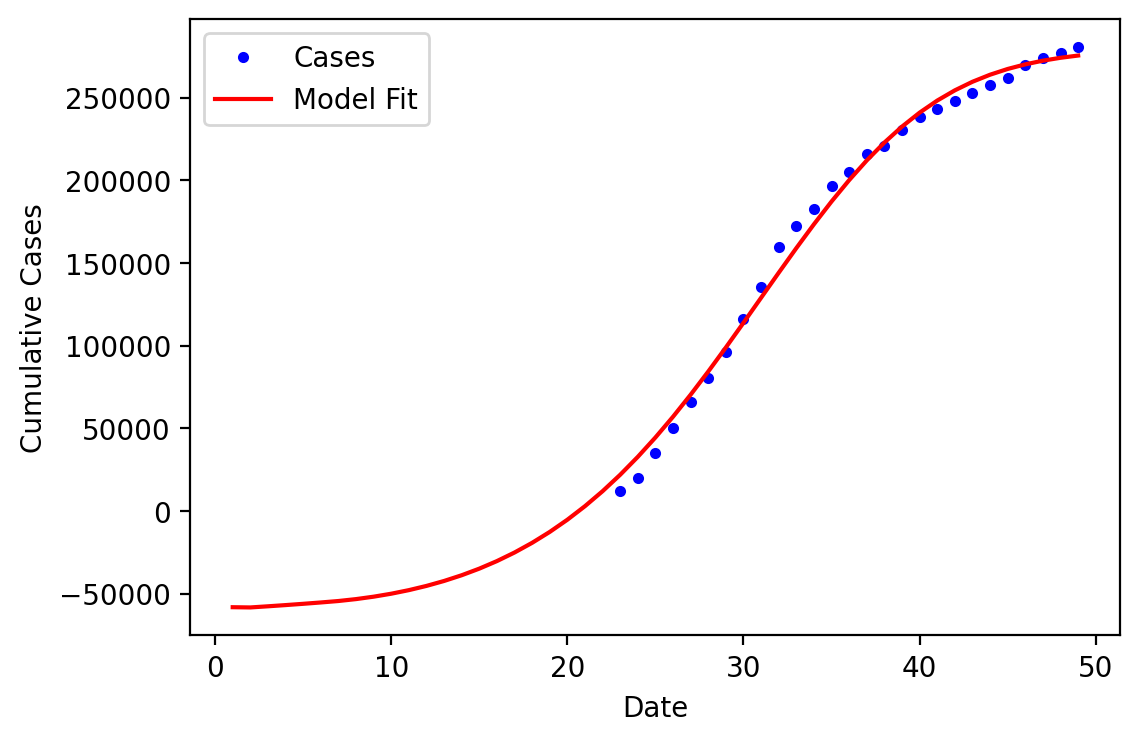

In [102]:
Date = data_haiti_1['Date']
Outbreak_data = data_haiti_1['PNAS 2']


dt = 1
Ndays = len(Outbreak_data)

burnin = 22


a=5.0*10**(-8)
beta=1.728*10**(-7)
r=0.010310615
xi=0.964650025330277
N=350000
c=550000
K=600000


# a=3.72385744*10**(-7)
# beta=1.718183*10**(-7)
# r=0.0010310615
# xi=0.964650025330277
# N=300000
# c=499386.072573065
# K=600000


I_t = range(Ndays+burnin)
I_t
I = np.zeros(Ndays+burnin+1)
B = np.zeros(Ndays+burnin+1)
alph=np.zeros(Ndays+burnin+1)


I[0]=Outbreak_data[0]
B[0]=500000
alph[0]=a*(B[0]-c)



Sum=0

# #Euler approximation step equations
for n in I_t:
    B[n+1] = B[n]+(r*B[n]*(1-B[n]/K)+xi*I[n])*dt
    I[n+1] = I[n] + dt*(alph[n]*(N-I[n])+beta*I[n]*(N-I[n]))
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)])

    # for j in I_t:
    #     #print("Cases=", Cases[j])
    #     #print("j=", j)
    #     if n+1 == Date[j]:
    #         diff=(I[n+1]-Outbreak_data[j])**2
    #         Sum=Sum+diff
    #         # print("Diff=", diff, "I=", I[n], "Cases=", Outbreak_data[j])
    #     else:
    #          diff=0
    #     #print("diff=", diff)


# print("SumSquares=", Sum)


print('I(t)=', I[n+1])
print('B(t)=', B[n+1])

# print('I=', len(I[burnin+1:]))
# print('D=', len(Date))


DateDF = np.zeros(Ndays+burnin)
CaseDF = np.zeros(Ndays+burnin)

for i in I_t:
  # print(i)
  if i in range(burnin):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin] + I[burnin-1]
  # else:
  #   DataFrame['Date'][i-burnin] = Date[i]+burnin

# print(DateDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
# print(DataFrame)

Sum=0

for n in I_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print(DataFrame['Model'])


# fig = plt.figure()
# l1= plt.plot(t, I, data_all_haiti['Date'], data_all_haiti['PNAS 2'])
# plt.xlabel('Time')
# plt.show()


figure(1, [6, 4])
plt.plot(DataFrame['Date'], DataFrame['Cases']-I[burnin-1], 'b.', label='Cases')
plt.plot(DataFrame['Date'], DataFrame['Model']-I[burnin-1], 'r-', label='Model Fit')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.legend()


I(t)= 39030.12228391417
B(t)= 850822.3588354514
SumSquares= 59391835.716280065


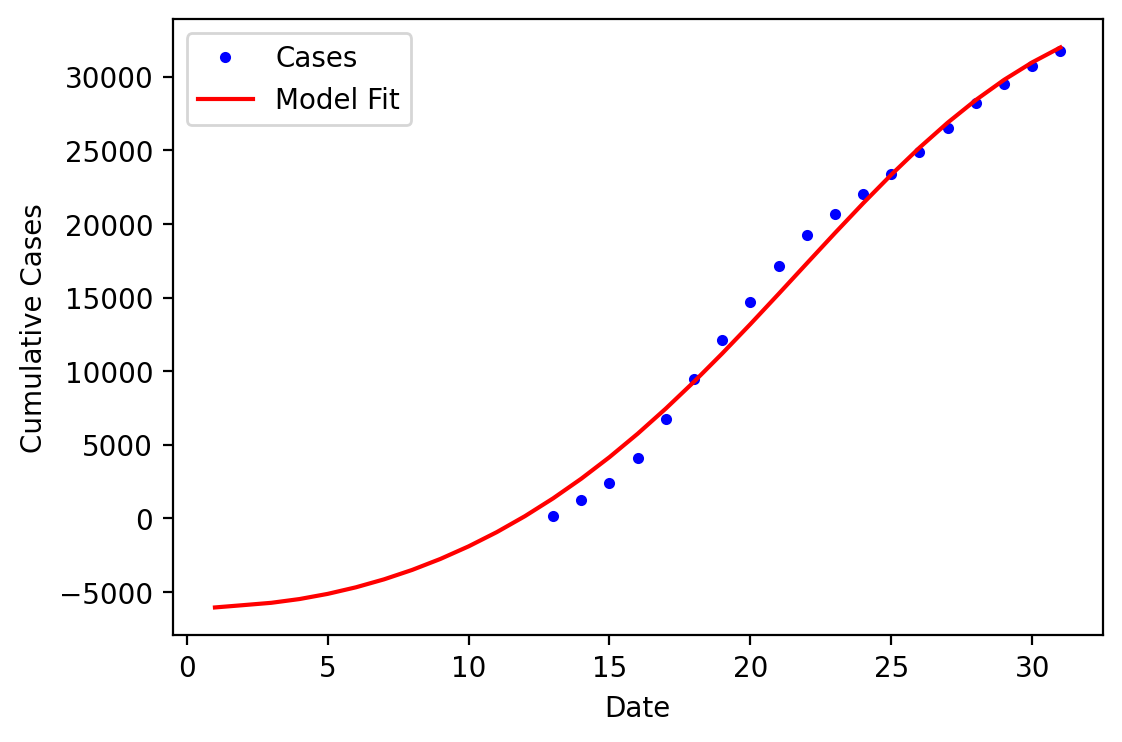

In [19]:
Date = data_haiti_2['Date']
Outbreak_data = data_haiti_2['PAHO 2']

# print('Date=', Date)

# print('Outbreak_data=', Outbreak_data)


dt = 1
Ndays = len(Outbreak_data)

burnin = 12


a=7.25*10**(-7)
beta=6.2*10**(-7)
r=0.070
xi=0.964650025330277
N=42000
c=550000
K=600000


I_t = range(Ndays+burnin)
I_t
I = np.zeros(Ndays+burnin+1)
B = np.zeros(Ndays+burnin+1)
alph=np.zeros(Ndays+burnin+1)


I[0]=Outbreak_data[0]
B[0]=555000
alph[0]=a*(B[0]-c)



# Sum=0

# # #Euler approximation step equations
for n in I_t:
    B[n+1] = B[n]+(r*B[n]*(1-B[n]/K)+xi*I[n])*dt
    I[n+1] = I[n] + dt*(alph[n]*(N-I[n])+beta*I[n]*(N-I[n]))
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)])


print('I(t)=', I[n+1])
print('B(t)=', B[n+1])

# print('I=', len(I[burnin+1:]))
# print('D=', len(Date))


DateDF = np.zeros(Ndays+burnin)
CaseDF = np.zeros(Ndays+burnin)

for i in I_t:
  # print(i)
  if i in range(burnin):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin] + I[burnin-1]
  # else:
  #   DataFrame['Date'][i-burnin] = Date[i]+burnin

# print(DateDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
# print(DataFrame)

Sum=0

for n in I_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print(DataFrame['Model'])


# fig = plt.figure()
# l1= plt.plot(t, I, data_all_haiti['Date'], data_all_haiti['PNAS 2'])
# plt.xlabel('Time')
# plt.show()


figure(1, [6, 4])
plt.plot(DataFrame['Date'], DataFrame['Cases']-I[burnin-1], 'b.', label='Cases')
plt.plot(DataFrame['Date'], DataFrame['Model']-I[burnin-1], 'r-', label='Model Fit')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.legend()


## New Model:

    Date      PNAS
0      1  0.003429
1      2  0.005657
2      3  0.010114
3      4  0.014414
4      5  0.018786
5      6  0.023000
6      7  0.027429
7      8  0.033200
8      9  0.038771
9     10  0.045657
10    11  0.049257
11    12  0.052114
12    13  0.056114
13    14  0.058543
14    15  0.061629
15    16  0.063063
16    17  0.065920
17    18  0.068091
18    19  0.069506
19    20  0.070791
20    21  0.072263
21    22  0.073606
22    23  0.074806
23    24  0.077149
24    25  0.078234
25    26  0.079177
26    27  0.080120


Text(0.5, 1.0, 'Haiti (PNAS)')

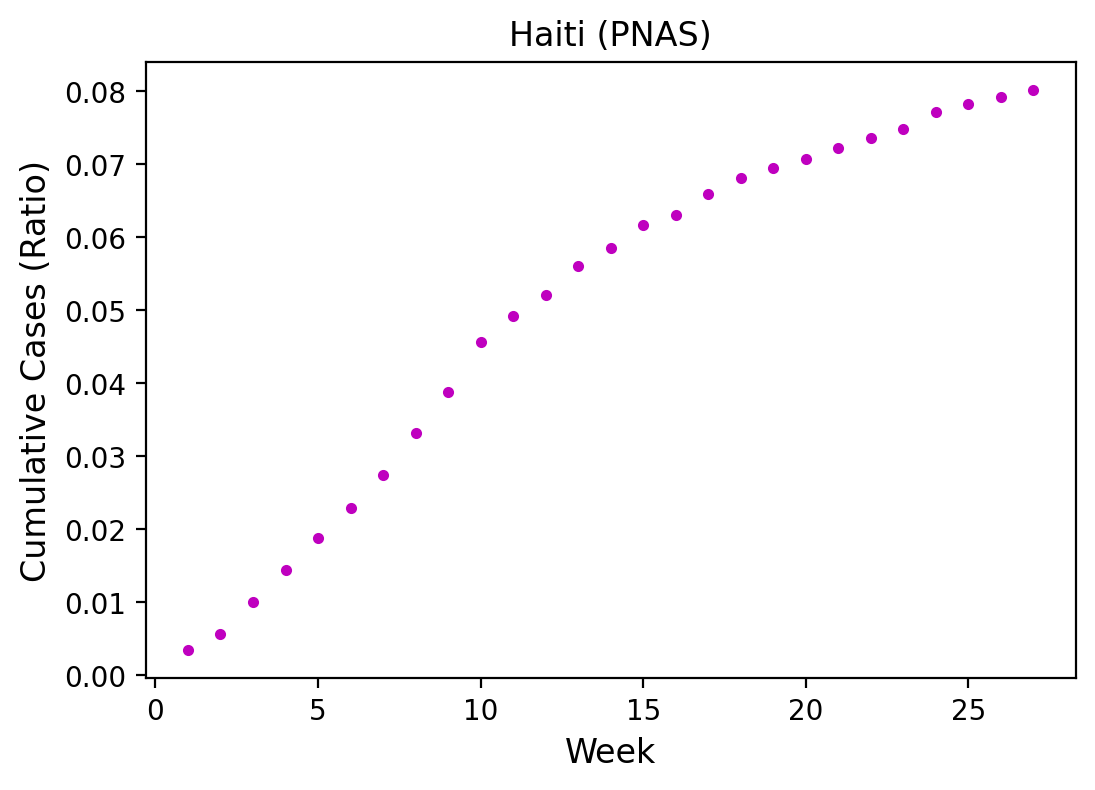

In [20]:
Population_1 = 3500000

data_haiti_3 = pd.DataFrame()
data_haiti_3['Date'] = data_haiti_1['Date']
data_haiti_3['PNAS'] = data_haiti_1['PNAS 2']/Population_1

print(data_haiti_3)

figure(1, [6, 4])
plot(data_haiti_3['Date'], data_haiti_3['PNAS'], 'm.')
xlabel('Week', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Haiti (PNAS)')


    Date      PAHO
0    1.0  0.000395
1    2.0  0.003118
2    3.0  0.006060
3    4.0  0.010325
4    5.0  0.016852
5    6.0  0.023735
6    7.0  0.030355
7    8.0  0.036713
8    9.0  0.042855
9   10.0  0.048072
10  11.0  0.051623
11  12.0  0.055050
12  13.0  0.058417
13  14.0  0.062190
14  15.0  0.066310
15  16.0  0.070498
16  17.0  0.073710
17  18.0  0.076798
18  19.0  0.079335


Text(0.5, 1.0, 'Haiti (PAHO)')

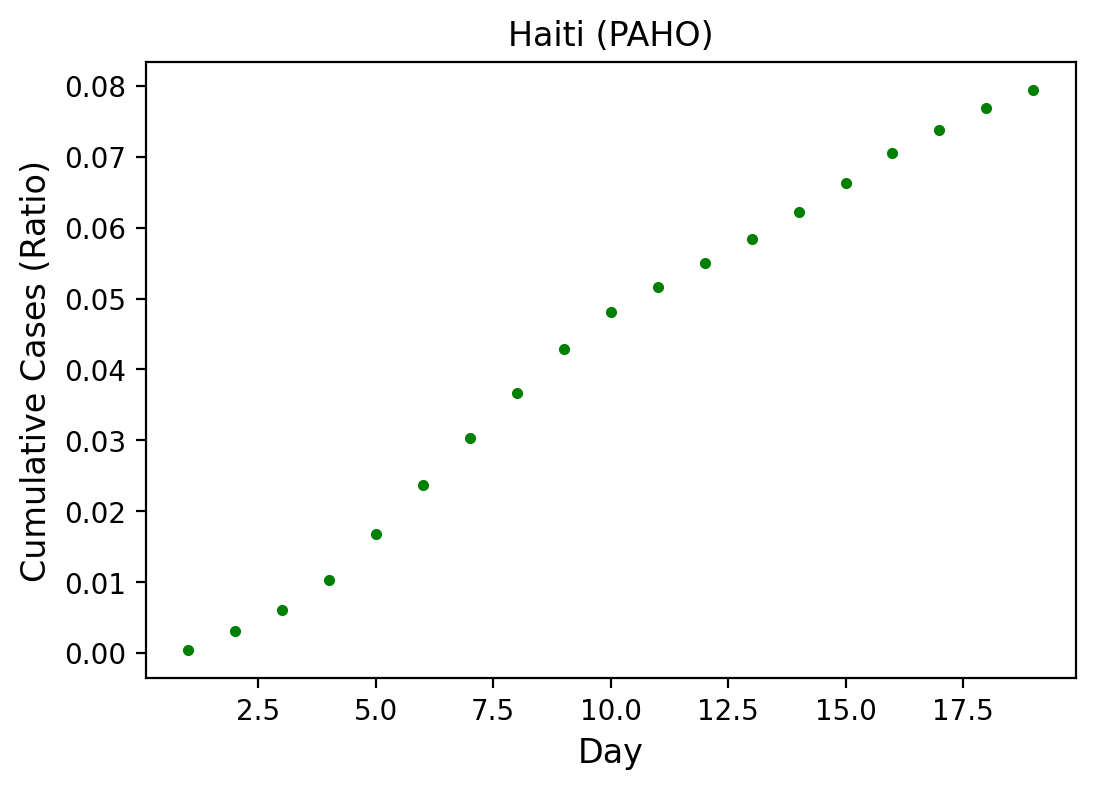

In [21]:
Population_2 = 400000

data_haiti_4 = pd.DataFrame()
data_haiti_4['Date'] = data_haiti_2['Date']
data_haiti_4['PAHO'] = data_haiti_2['PAHO 2']/Population_2

print(data_haiti_4)

figure(1, [6, 4])
plot(data_haiti_4['Date'], data_haiti_4['PAHO'], 'g.')
xlabel('Day', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Haiti (PAHO)')


## New Model fit:

## Haiti:

SumSquares= 0.0800557550644073


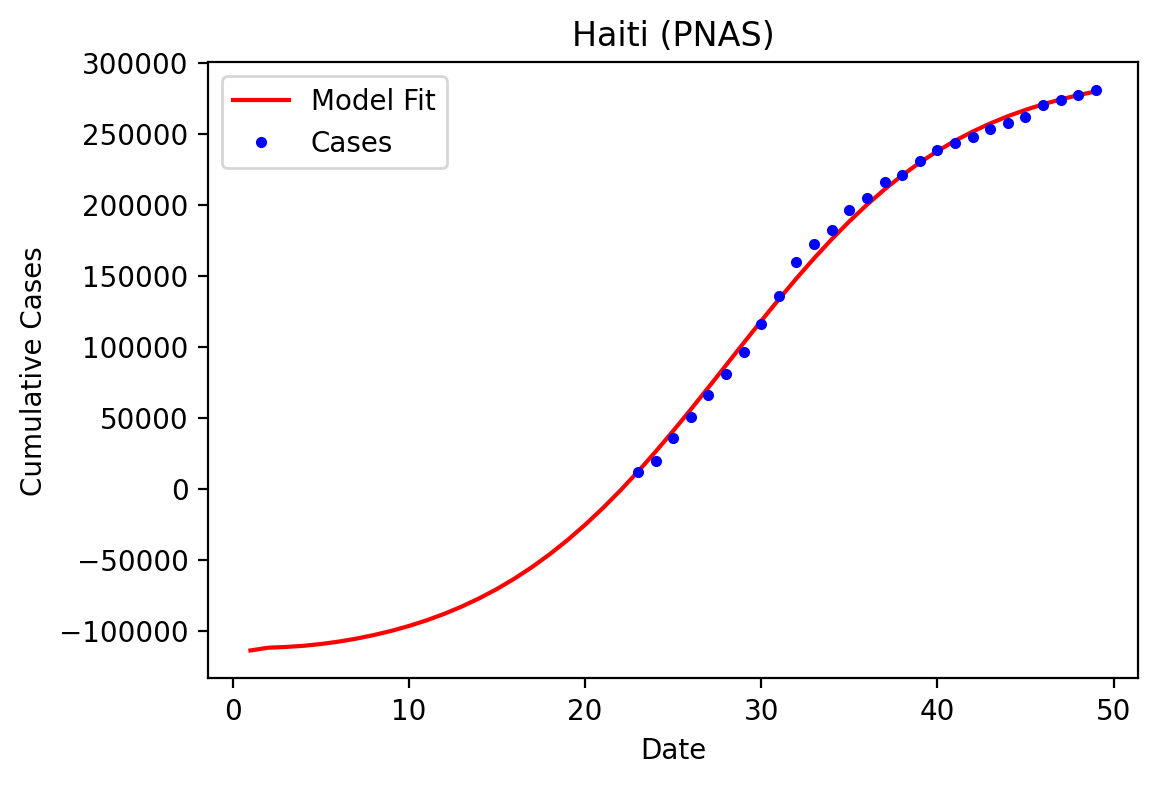

In [22]:
## Haiti 1 (PNAS)

Date = data_haiti_3['Date']
Outbreak_data = data_haiti_3['PNAS']

burnin = 22

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=0.6
lamb = 2.0
sigma = 0.10
mu = 4.7*10**(-4)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.24     ## Asymptomatic recovery
p_I = 0.84     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic


I_t = range(Ndays+burnin)
I_t
S = np.zeros(Ndays+burnin+1)
I = np.zeros(Ndays+burnin+1)
A = np.zeros(Ndays+burnin+1)
B = np.zeros(Ndays+burnin+1)
alph=np.zeros(Ndays+burnin+1)


I[0] = 0.003
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=12000/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in I_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(Ndays+burnin)
CaseDF = np.zeros(Ndays+burnin)

for i in I_t:
  # print(i)
  if i in range(burnin):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]


Sum=0

for n in I_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - np.sum(I[0:burnin-1]))


figure(1, [6, 4])
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Model']*Population_1, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_1, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Haiti (PNAS)')
plt.legend()

SumSquares= 0.041556062927560616


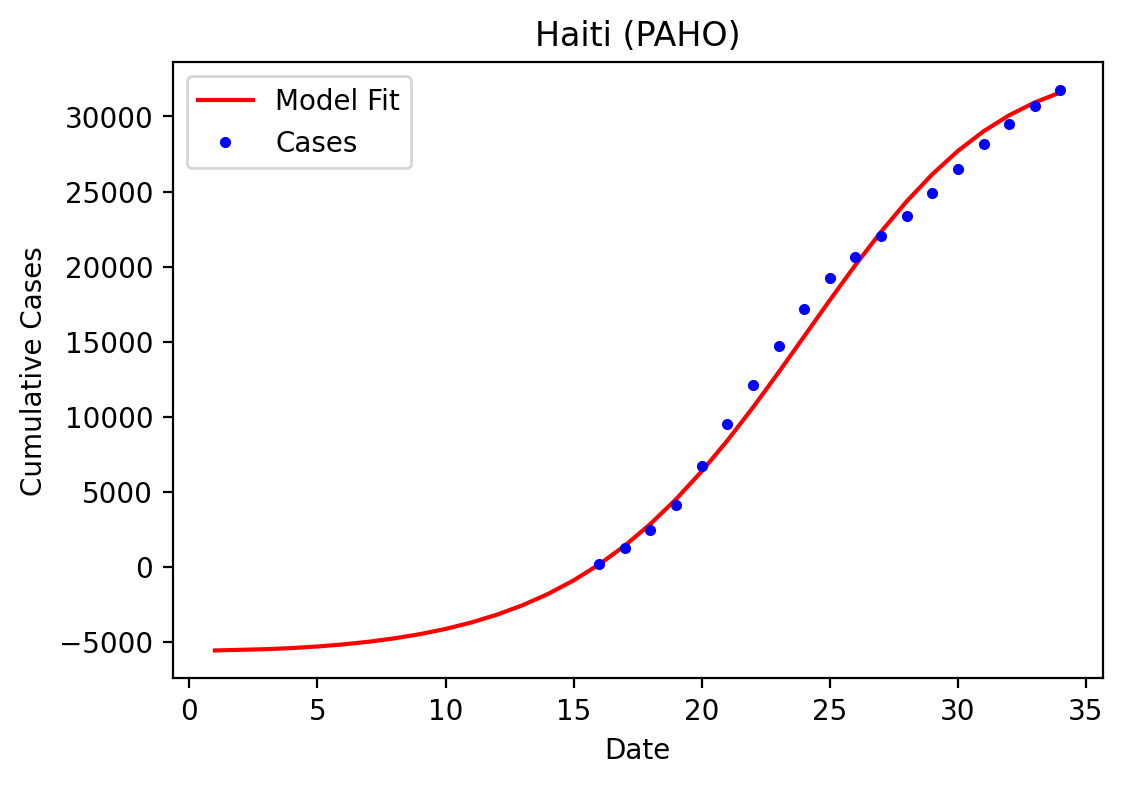

In [23]:
## Haiti 2 (PAHO)

Date = data_haiti_4['Date']
Outbreak_data = data_haiti_4['PAHO']

burnin = 15

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=0.9
lamb = 1.8
sigma = 0.10
mu = 2*10**(-4)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.05     ## Asymptomatic recovery
p_I = 1.02     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic


I_t = range(Ndays+burnin)
I_t
S = np.zeros(Ndays+burnin+1)
I = np.zeros(Ndays+burnin+1)
A = np.zeros(Ndays+burnin+1)
B = np.zeros(Ndays+burnin+1)
alph=np.zeros(Ndays+burnin+1)


I[0] = 0.0004
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=12000/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in I_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(Ndays+burnin)
CaseDF = np.zeros(Ndays+burnin)

for i in I_t:
  # print(i)
  if i in range(burnin):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]


Sum=0

for n in I_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - np.sum(I[0:burnin-1]))


figure(1, [6, 4])
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Model']*Population_2, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_2, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Haiti (PAHO)')
plt.legend()

## Comoros:

   Date  Comoros  Cases (Ratio)
0     1    102.0       0.001700
1     2    233.0       0.003883
2     3    333.0       0.005550
3     4    569.0       0.009483
4     5    787.0       0.013117
5     6   1769.0       0.029483
6     7   2498.0       0.041633
7     8   3864.0       0.064400
8     9   4976.0       0.082933


Text(0.5, 1.0, 'Comoros')

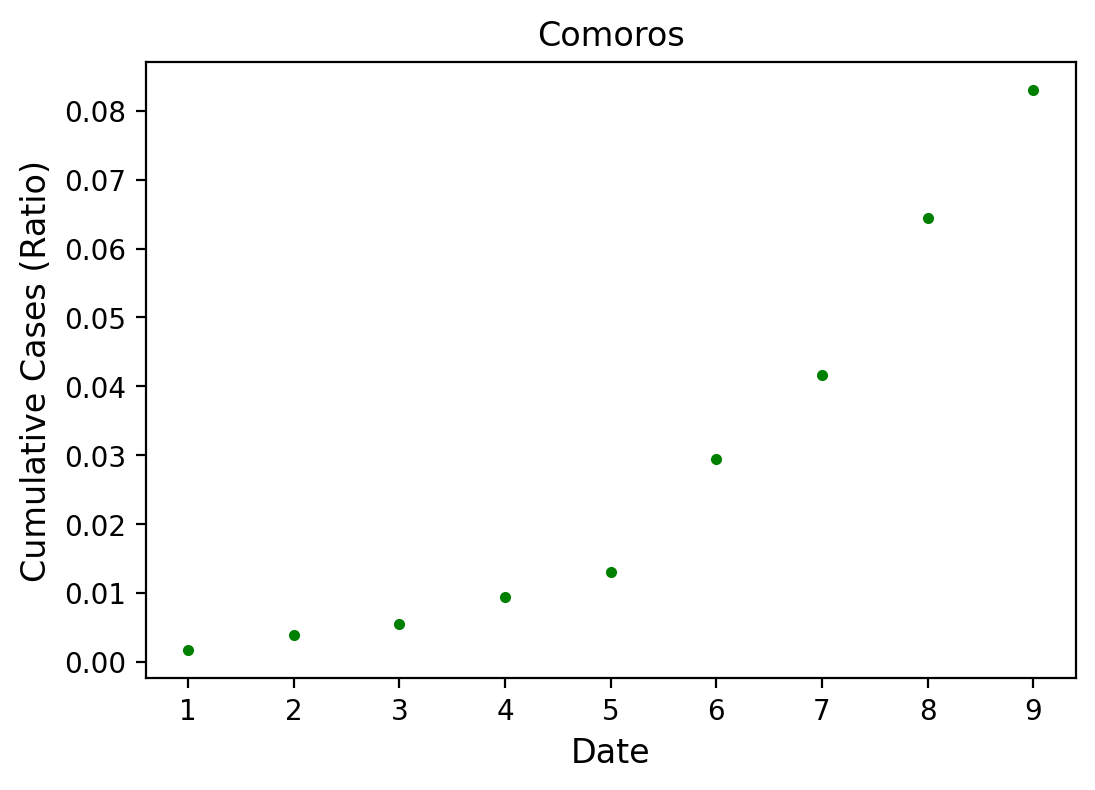

In [24]:
Population_comoros = 60000

data_comoros = data_all[data_all['Comoros'].notnull()]

data_comoros = data_comoros.drop(columns=['Burundi', 'Ethiopia', 'Kenya', 'Malawi',
                                          'Mozambique', 'Somalia', 'Sudan', 'Zambia', 'Zimbabwe'])

data_comoros['Day_new'] = data_comoros['Day']-data_comoros['Day'].min()+1

data_comoros['Date'] = data_comoros['Day_new']//7+1

data_comoros['Cases (Ratio)'] = data_comoros['Comoros']/Population_comoros

data_comoros = data_comoros.drop(columns=['Day', 'Day_new'])

## Removing first few points:

data_comoros = data_comoros.iloc[4:]

data_comoros['Date']= data_comoros['Date'] - data_comoros['Date'].min() + 1



data_comoros.reset_index(drop=True, inplace=True)

print(data_comoros)

figure(1, [6, 4])
plot(data_comoros['Date'], data_comoros['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Comoros')

SumSquares= 0.005894850555884737


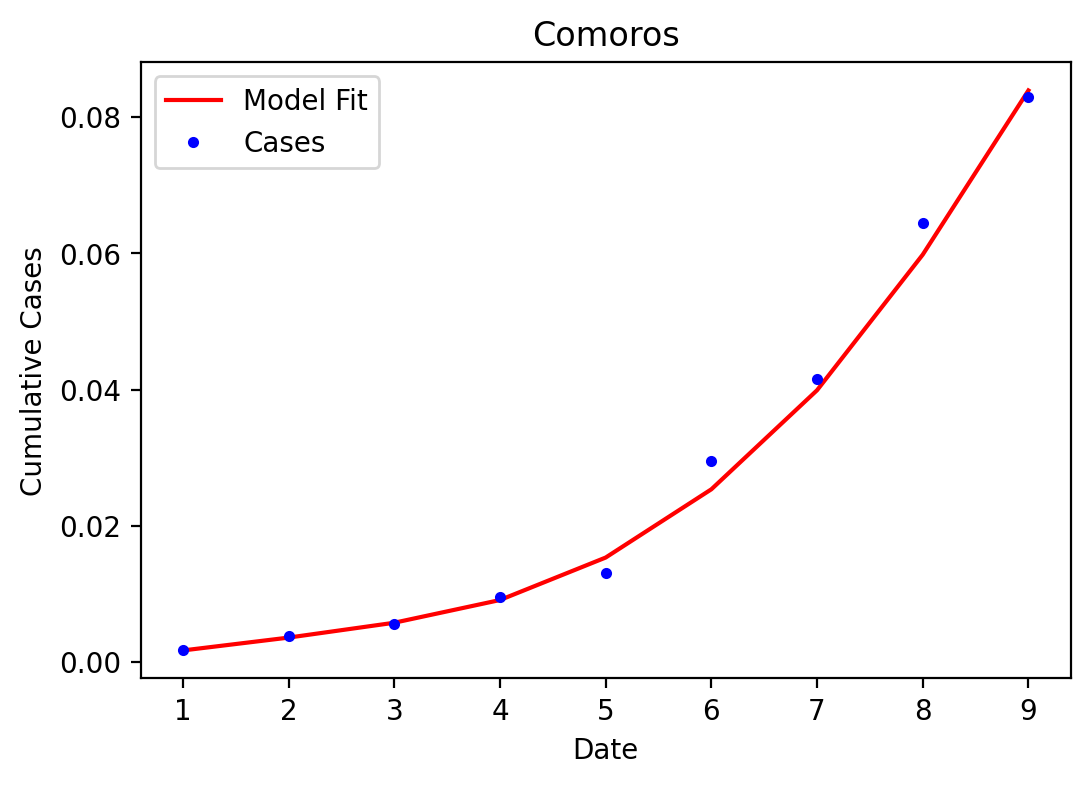

In [25]:
Date = data_comoros['Date']
Outbreak_data = data_comoros['Cases (Ratio)']

burnin = 0

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=8
lamb = 1.
sigma = 0.10
mu = 1.5*10**(-3)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.4     ## Asymptomatic recovery
p_I = 0.78     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic


I_t = range(Ndays+burnin)
I_t
S = np.zeros(Ndays+burnin+1)
I = np.zeros(Ndays+burnin+1)
A = np.zeros(Ndays+burnin+1)
B = np.zeros(Ndays+burnin+1)
alph=np.zeros(Ndays+burnin+1)


I[0] = 0.0004
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=12000/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in I_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(Ndays+burnin)
CaseDF = np.zeros(Ndays+burnin)

for i in I_t:
  # print(i)
  if i in range(burnin):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]


Sum=0

for n in I_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - np.sum(I[0:burnin-1]))


figure(1, [6, 4])
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
# plt.plot(DataFrame['Date'], DataFrame['Model']*Population_comoros, 'r-', label='Model Fit')
# plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_comoros, 'b.', label='Cases')

plt.plot(DataFrame['Date'], DataFrame['Model'], 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases'], 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Comoros')
plt.legend()

## Kenya:

    Date  Day   Kenya  Day_new
0      1    1   347.0        1
2      3   16   980.0       16
3      4   22  1336.0       22
4      5   29  1541.0       29
5      6   37  1790.0       37
6      7   43  1995.0       43
7      8   51  2623.0       51
8      9   58  3090.0       58
9     10   65  3541.0       65
11    12   80  4670.0       80
12    13   85  4720.0       85
13    14   95  5352.0       95
14    16  106  5605.0      106
16    18  120  6355.0      120
17    19  128  6916.0      128
18    20  135  7065.0      135
19    21  142  7533.0      142
21    23  157  7757.0      157
22    24  164  7915.0      164
23    27  185  8035.0      185
24    28  191  8137.0      191
25    29  200  8202.0      200
26    30  206  8213.0      206
27    31  213  8260.0      213
28    32  220  8320.0      220
29    33  227  8348.0      227
30    34  234  8377.0      234
31    35  241  8420.0      241
32    36  246  8439.0      246
34    38  260  8448.0      260
36    40  275  8458.0      275
38    42

Text(0.5, 1.0, 'Kenya')

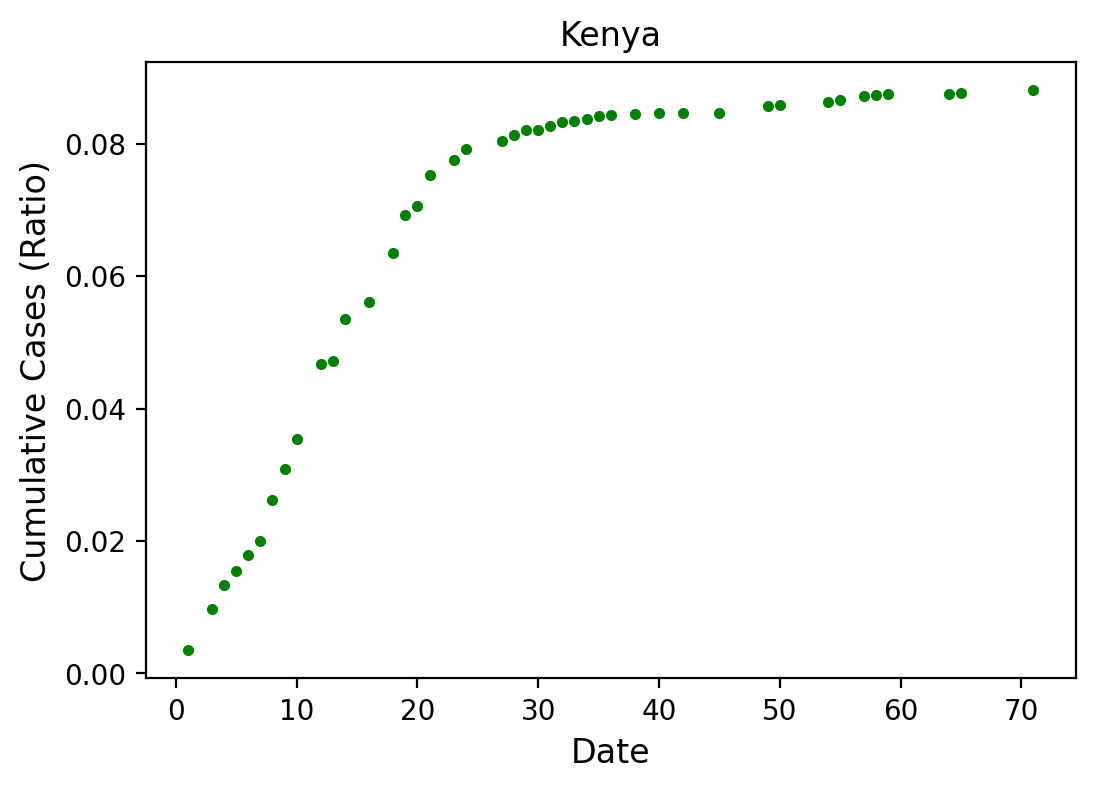

In [26]:
Population_kenya = 100000

data_kenya = data_all[data_all['Kenya'].notnull()]

data_kenya = data_kenya.drop(columns=['Burundi', 'Ethiopia', 'Comoros', 'Malawi',
                                          'Mozambique', 'Somalia', 'Sudan', 'Zambia', 'Zimbabwe'])

data_kenya['Day_new'] = data_kenya['Day']-data_kenya['Day'].min()+1

data_kenya['Date'] = data_kenya['Day_new']//7+1

print(data_kenya)


data_kenya['Cases (Ratio)'] = data_kenya['Kenya']/Population_kenya

data_kenya = data_kenya.drop(columns=['Day', 'Day_new'])

# ## Removing first few points:

# data_comoros = data_comoros.iloc[4:]

# data_comoros['Date']= data_comoros['Date'] - data_comoros['Date'].min() + 1



data_kenya.reset_index(drop=True, inplace=True)

# print(data_kenya)

figure(1, [6, 4])
plot(data_kenya['Date'], data_kenya['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Kenya')

SumSquares= 0.21342248792478027


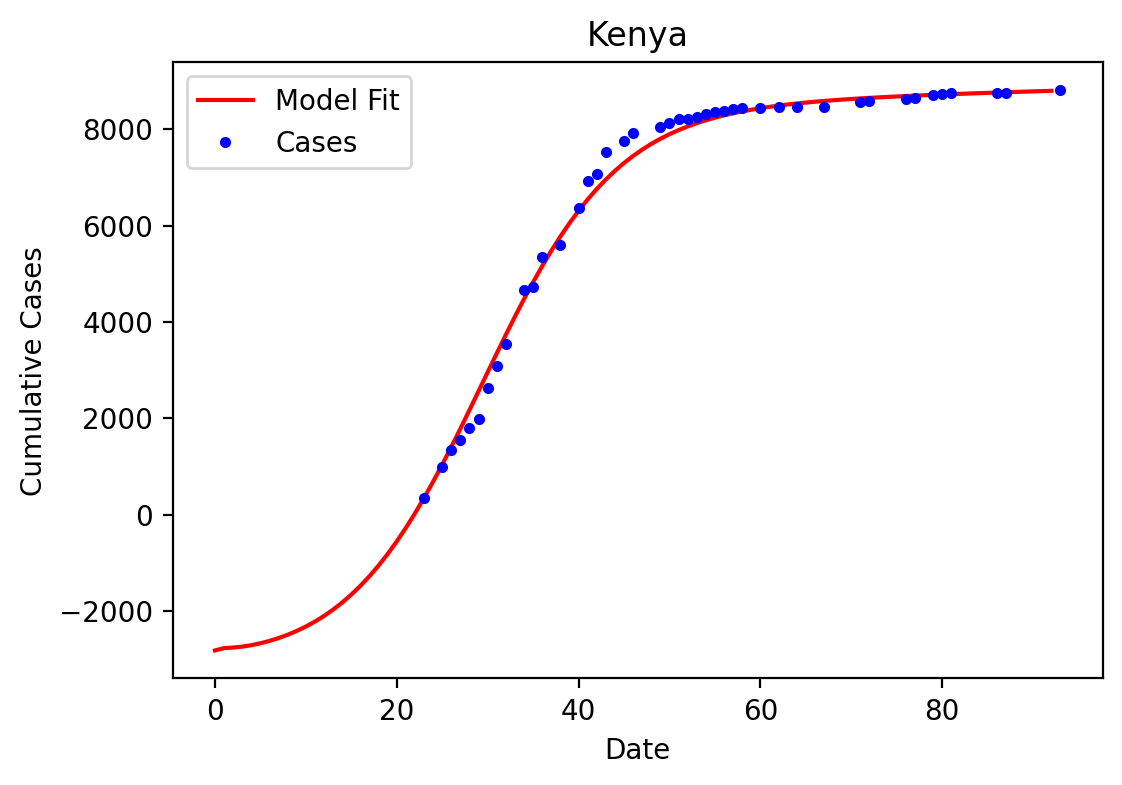

In [27]:
## Kenya

Date = data_kenya['Date']
Outbreak_data = data_kenya['Cases (Ratio)']

burnin = 22

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=0.51
lamb = 2.0
sigma = 0.10
mu = 4.7*10**(-4)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.255     ## Asymptomatic recovery
p_I = 0.86     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic


I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin)
S = np.zeros(max(Date)+burnin+1)
I = np.zeros(max(Date)+burnin+1)
A = np.zeros(max(Date)+burnin+1)
B = np.zeros(max(Date)+burnin+1)
alph= np.zeros(max(Date)+burnin+1)


I[0] = 0.003
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=12000/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin)
CaseDF = np.zeros(max(Date) + burnin)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+2])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_kenya, 'r-', label='Model Fit')
# plt.plot(DataFrame['Date'], DataFrame['Model']*Population_kenya, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_kenya, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Kenya')
plt.legend()

## Malawi:

    Date   Malawi  Cases (Ratio)
0      1   3055.0       0.006789
1      2   7131.0       0.015847
2      3  12046.0       0.026769
3      4  15746.0       0.034991
4      5  20172.0       0.044827
5      6  24748.0       0.054996
6      7  27850.0       0.061889
7      8  31906.0       0.070902
8      9  34202.0       0.076004
9     10  36081.0       0.080180
10    11  37839.0       0.084087
11    12  39116.0       0.086924
12    13  40120.0       0.089156
13    14  40882.0       0.090849
14    16  41360.0       0.091911
15    17  41650.0       0.092556
16    18  41815.0       0.092922
17    19  41992.0       0.093316
18    20  42085.0       0.093522
19    21  42161.0       0.093691
20    22  42196.0       0.093769
21    23  42197.0       0.093771
22    24  42231.0       0.093847
23    27  42252.0       0.093893
24    28  42262.0       0.093916
25    29  42268.0       0.093929
26    30  42272.0       0.093938
27    31  42300.0       0.094000
28    35  42304.0       0.094009
29    37  

Text(0.5, 1.0, 'Malawi')

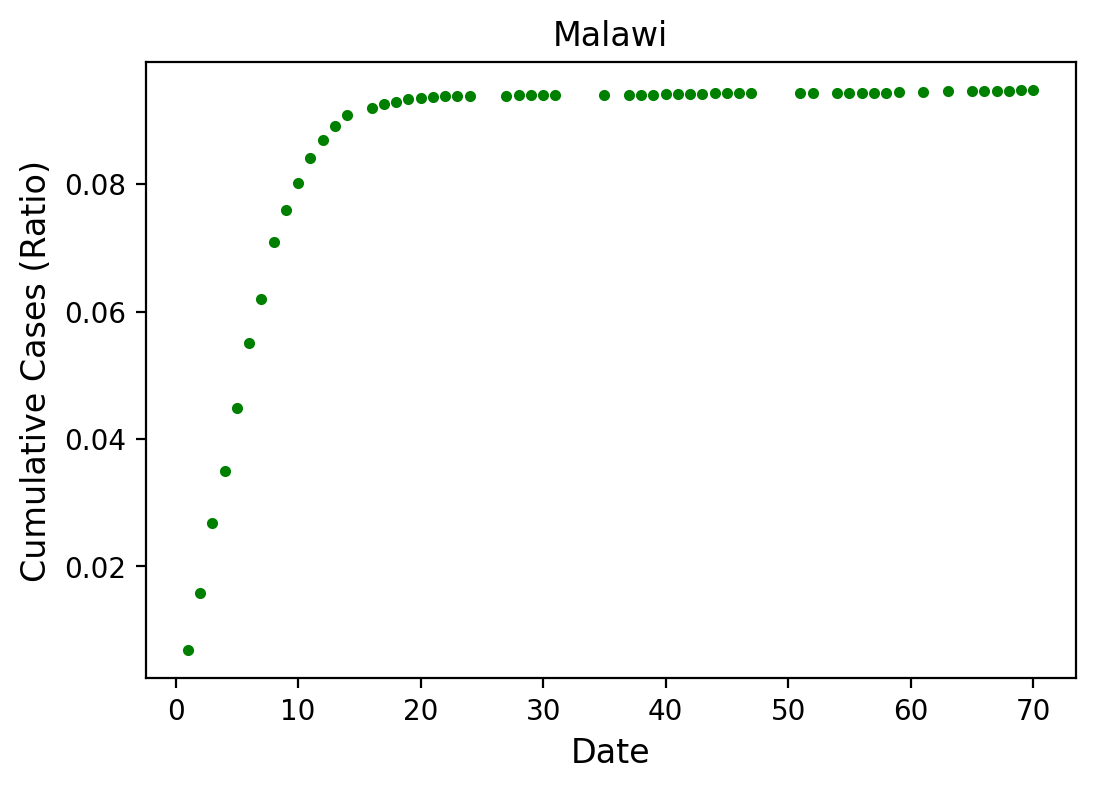

In [28]:
Population_malawi = 450000

data_malawi = data_all[data_all['Malawi'].notnull()]

data_malawi = data_malawi.drop(columns=['Burundi', 'Ethiopia', 'Kenya', 'Comoros',
                                          'Mozambique', 'Somalia', 'Sudan', 'Zambia', 'Zimbabwe'])

data_malawi['Day_new'] = data_malawi['Day']-data_malawi['Day'].min()+1

data_malawi['Date'] = data_malawi['Day_new']//7+1

# print(data_malawi)

data_malawi['Cases (Ratio)'] = data_malawi['Malawi']/Population_malawi

data_malawi = data_malawi.drop(columns=['Day', 'Day_new'])

# ## Removing first few points:

# data_comoros = data_comoros.iloc[4:]

# data_comoros['Date']= data_comoros['Date'] - data_comoros['Date'].min() + 1



data_malawi.reset_index(drop=True, inplace=True)

print(data_malawi)

figure(1, [6, 4])
plot(data_malawi['Date'], data_malawi['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Malawi')

SumSquares= 0.42181105327920726


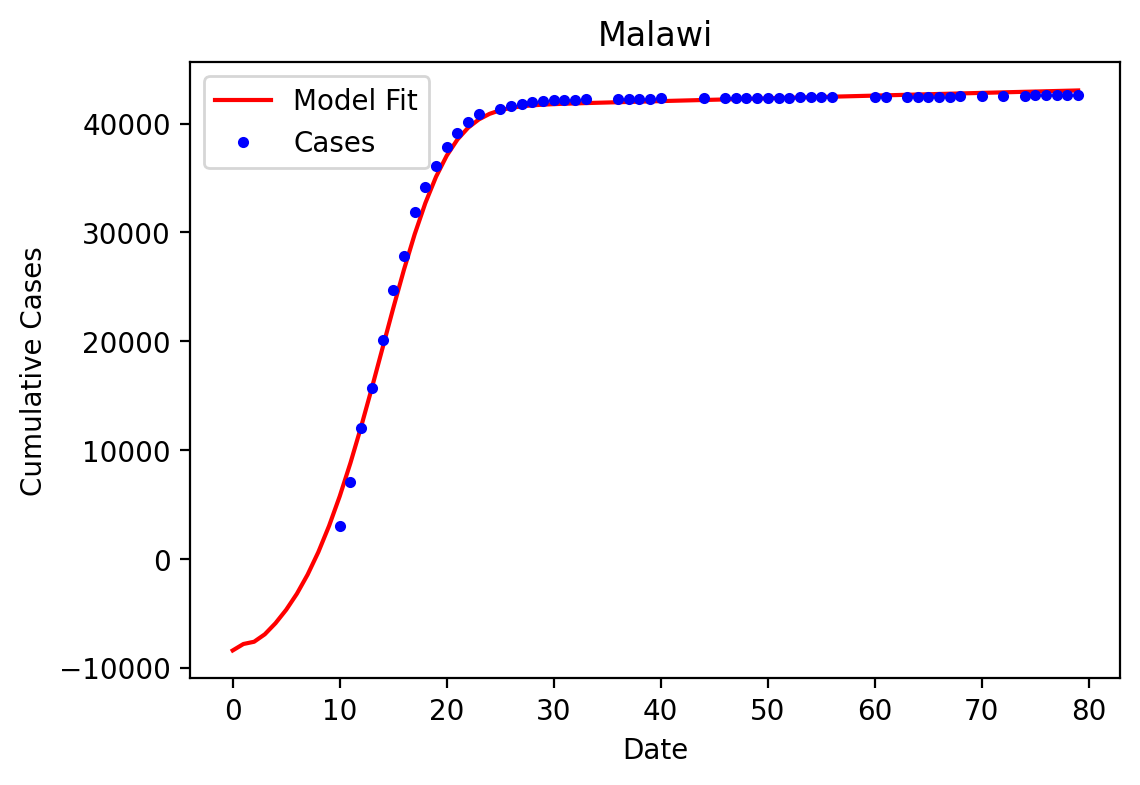

In [29]:
## Malawi

Date = data_malawi['Date']
Outbreak_data = data_malawi['Cases (Ratio)']

burnin = 9

Ndays = len(Outbreak_data)

dt = 1
K=600000
a = 7.52
lamb = 6
sigma = 0.10
mu = 4.7*10**(-4)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.595    ## Asymptomatic recovery
p_I = 0.85     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic


I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin+1)
S = np.zeros(max(Date)+burnin+2)
I = np.zeros(max(Date)+burnin+2)
A = np.zeros(max(Date)+burnin+2)
B = np.zeros(max(Date)+burnin+2)
alph= np.zeros(max(Date)+burnin+2)


I[0] = 0.007
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=12000/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin + 1)
CaseDF = np.zeros(max(Date) + burnin + 1)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin+1):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(I, 'r-', label='Model Fit')
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_malawi, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_malawi, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Malawi')
plt.legend()

## Mozambique:

    Date  Mozambique  Cases (Ratio)
0      1      1014.0       0.002897
1      2      1776.0       0.005074
2      3      2256.0       0.006446
3      4      2602.0       0.007434
4      5      3938.0       0.011251
5      6      4647.0       0.013277
6      7      5260.0       0.015029
7      8      6690.0       0.019114
8      9      7720.0       0.022057
9     10      8877.0       0.025363
10    11     11923.0       0.034066
11    12     19706.0       0.056303
12    13     24075.0       0.068786
13    15     25638.0       0.073251
14    16     27247.0       0.077849
15    17     27945.0       0.079843
16    18     28647.0       0.081849
17    19     28989.0       0.082826
18    20     29537.0       0.084391
19    21     30007.0       0.085734
20    22     30415.0       0.086900
21    23     30843.0       0.088123
22    26     30953.0       0.088437
23    27     31057.0       0.088734
24    28     31152.0       0.089006


Text(0.5, 1.0, 'Mozambique')

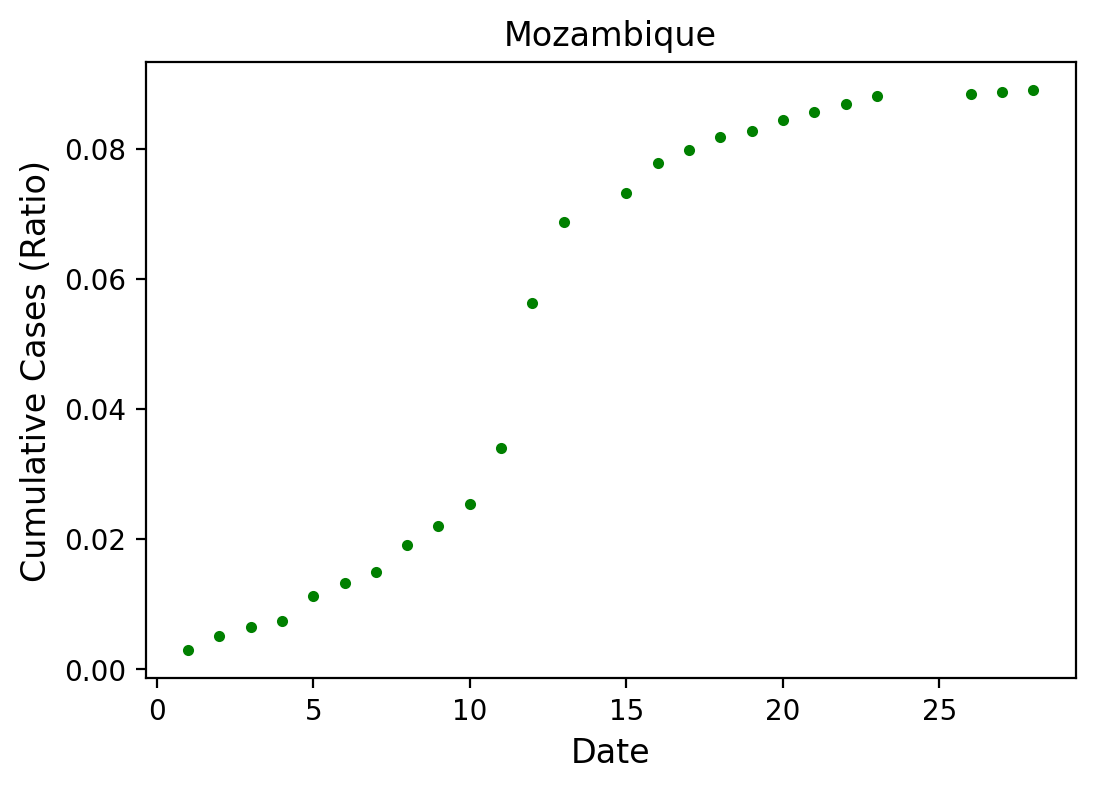

In [30]:
Population_moz = 350000

data_moz = data_all[data_all['Mozambique'].notnull()]

data_moz = data_moz.drop(columns=['Burundi', 'Ethiopia', 'Kenya', 'Comoros',
                                          'Malawi', 'Somalia', 'Sudan', 'Zambia', 'Zimbabwe'])

data_moz['Day_new'] = data_moz['Day']-data_moz['Day'].min()+1

data_moz['Date'] = data_moz['Day_new']//7+1

# print(data_moz)

data_moz['Cases (Ratio)'] = data_moz['Mozambique']/Population_moz

data_moz = data_moz.drop(columns=['Day', 'Day_new'])

## Removing first few points:

data_moz = data_moz.iloc[:25]

data_moz['Date']= data_moz['Date'] - data_moz['Date'].min() + 1



data_moz.reset_index(drop=True, inplace=True)

print(data_moz)

figure(1, [6, 4])
plot(data_moz['Date'], data_moz['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Mozambique')

SumSquares= 0.08886189824749638


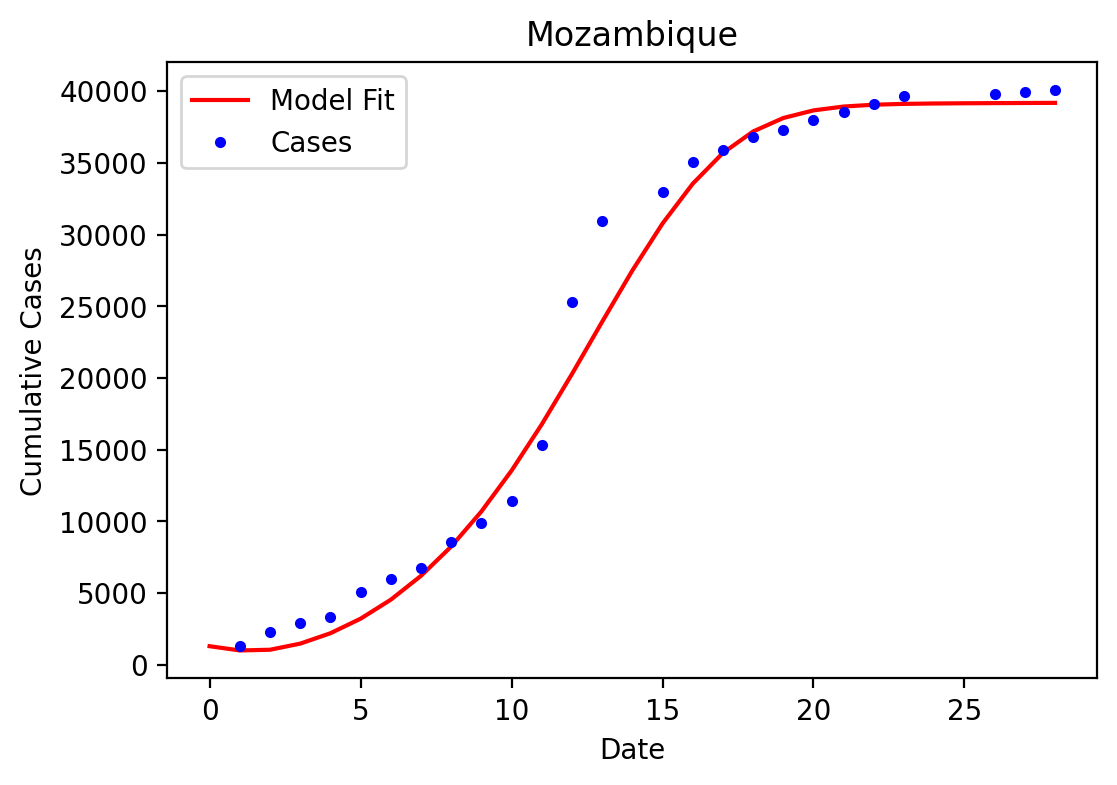

In [31]:
## Mozambique

Date = data_moz['Date']
Outbreak_data = data_moz['Cases (Ratio)']

burnin = 0

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=6.0
lamb = 7.5
sigma = 0.10
mu = 2.0*10**(-4)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.1     ## Asymptomatic recovery
p_I = 1.1     ## Symptomatic recovery
q_A = 0.255       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic



I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin+1)
S = np.zeros(max(Date)+burnin+2)
I = np.zeros(max(Date)+burnin+2)
A = np.zeros(max(Date)+burnin+2)
B = np.zeros(max(Date)+burnin+2)
alph= np.zeros(max(Date)+burnin+2)


I[0] = 0.007
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=10500/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin + 1)
CaseDF = np.zeros(max(Date) + burnin + 1)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin+1):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(I, 'r-', label='Model Fit')
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_malawi, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_malawi, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Mozambique')
plt.legend()

## Sudan:

    Date  Day    Sudan  Day_new
35     1  268    265.0        1
38     4  288    520.0       21
39     5  296   1320.0       29
42     8  317   2228.0       50
45    11  338   4881.0       71
47    13  353   6642.0       86
48    14  360   7970.0       93
63    31  479  10295.0      212
   Date    Sudan  Cases (Ratio)
0     1    265.0       0.002208
1     4    520.0       0.004333
2     5   1320.0       0.011000
3     8   2228.0       0.018567
4    11   4881.0       0.040675
5    13   6642.0       0.055350
6    14   7970.0       0.066417
7    31  10295.0       0.085792


Text(0.5, 1.0, 'Sudan')

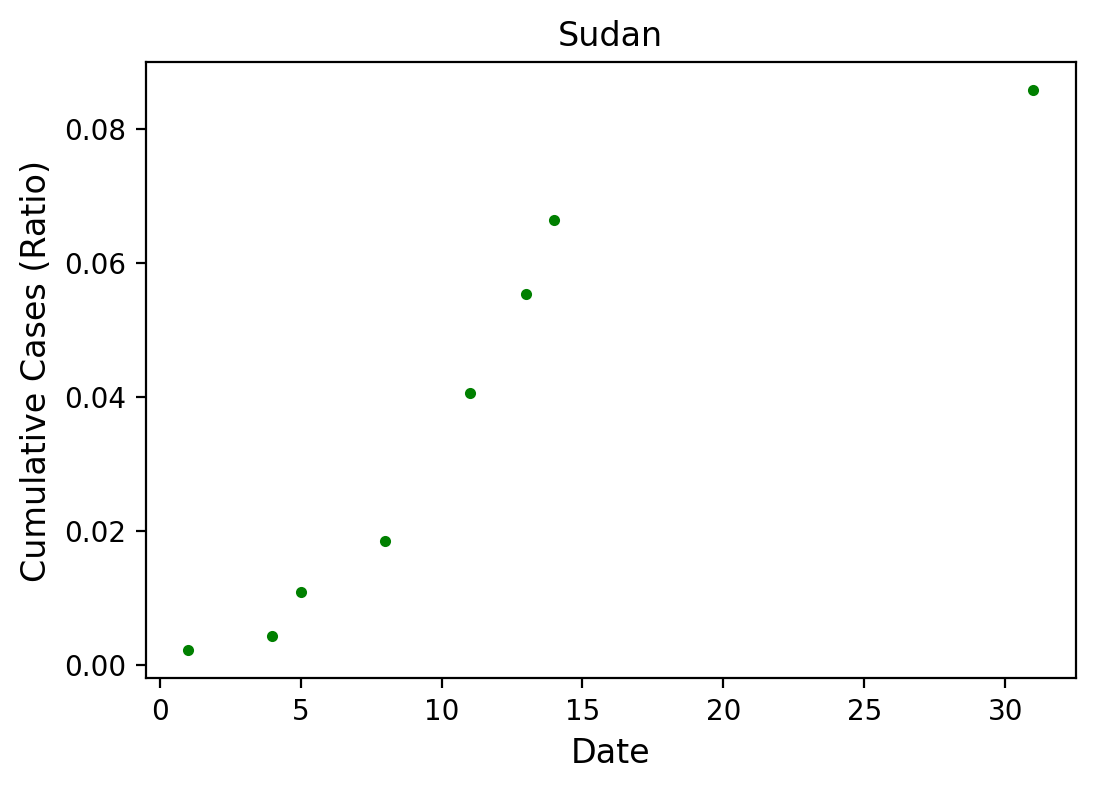

In [32]:
Population_sudan = 120000

data_sudan = data_all[data_all['Sudan'].notnull()]

data_sudan = data_sudan.drop(columns=['Burundi', 'Ethiopia', 'Kenya', 'Comoros',
                                          'Mozambique', 'Somalia', 'Malawi', 'Zambia', 'Zimbabwe'])

data_sudan['Day_new'] = data_sudan['Day']-data_sudan['Day'].min()+1

data_sudan['Date'] = data_sudan['Day_new']//7+1

print(data_sudan)

data_sudan['Cases (Ratio)'] = data_sudan['Sudan']/Population_sudan

data_sudan = data_sudan.drop(columns=['Day', 'Day_new'])

# # ## Removing first few points:

# # data_comoros = data_comoros.iloc[4:]

# # data_comoros['Date']= data_comoros['Date'] - data_comoros['Date'].min() + 1



data_sudan.reset_index(drop=True, inplace=True)

print(data_sudan)

figure(1, [6, 4])
plot(data_sudan['Date'], data_sudan['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Sudan')

SumSquares= 0.014478257853305324


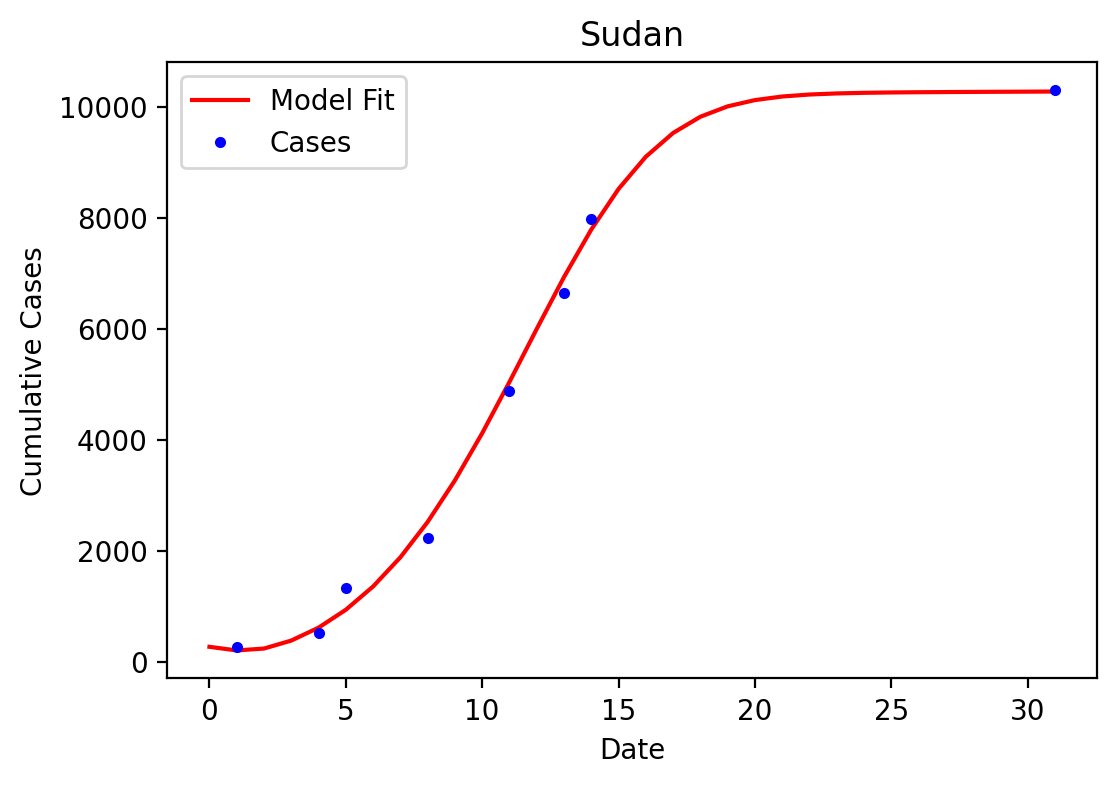

In [33]:
## Sudan

Date = data_sudan['Date']
Outbreak_data = data_sudan['Cases (Ratio)']

burnin = 0

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=1.5
lamb = 1.4
sigma = 0.10
mu = 2*10**(-4)
c=10000/K
r=0.070
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.05     ## Asymptomatic recovery
p_I = 1.11     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic


I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin+1)
S = np.zeros(max(Date)+burnin+2)
I = np.zeros(max(Date)+burnin+2)
A = np.zeros(max(Date)+burnin+2)
B = np.zeros(max(Date)+burnin+2)
alph= np.zeros(max(Date)+burnin+2)


I[0] = 0.007
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=12000/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin + 1)
CaseDF = np.zeros(max(Date) + burnin + 1)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin+1):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(I, 'r-', label='Model Fit')
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_sudan, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_sudan, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Sudan')
plt.legend()

## Zambia:

    Date   Zambia  Cases (Ratio)
0      1   1746.0       0.006984
1      2   1940.0       0.007760
2      3   2173.0       0.008692
3      4   2660.0       0.010640
4      5   3298.0       0.013192
5      6   3767.0       0.015068
6      7   7840.0       0.031360
7      8  11886.0       0.047544
8      9  14520.0       0.058080
9     10  16782.0       0.067128
10    11  18547.0       0.074188
11    12  19413.0       0.077652
12    14  19870.0       0.079480


Text(0.5, 1.0, 'Zambia')

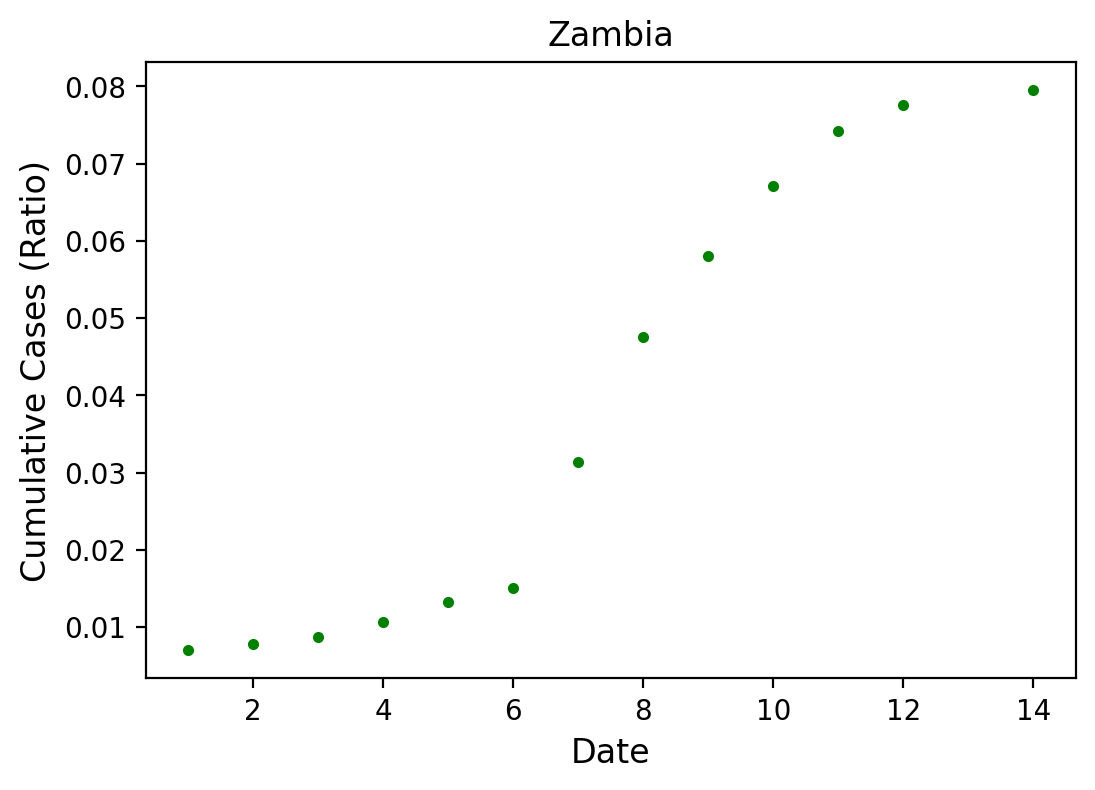

In [120]:
Population_zambia = 250000

data_zambia = data_all[data_all['Zambia'].notnull()]

data_zambia = data_zambia.drop(columns=['Burundi', 'Ethiopia', 'Kenya', 'Comoros',
                                          'Mozambique', 'Somalia', 'Malawi', 'Sudan', 'Zimbabwe'])

data_zambia['Day_new'] = data_zambia['Day']-data_zambia['Day'].min()+1

data_zambia['Date'] = data_zambia['Day_new']//7+1

# print(data_zambia)

data_zambia['Cases (Ratio)'] = data_zambia['Zambia']/Population_zambia

data_zambia = data_zambia.drop(columns=['Day', 'Day_new'])

## Removing first few points:

data_zambia = data_zambia.iloc[32:len(data_zambia)-9]

data_zambia['Date']= data_zambia['Date'] - data_zambia['Date'].min() + 1



data_zambia.reset_index(drop=True, inplace=True)

print(data_zambia)

figure(1, [6, 4])
plot(data_zambia['Date'], data_zambia['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Zambia')

SumSquares= 0.02348296665280096


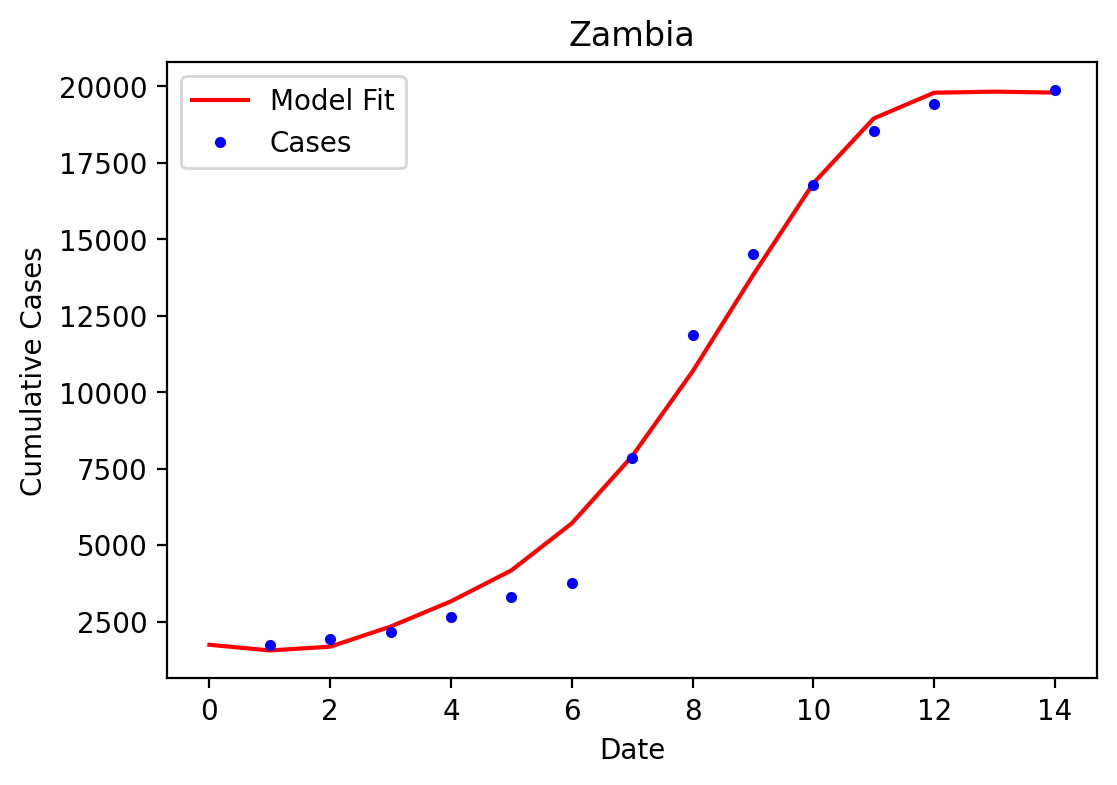

In [127]:
## Zambia

Date = data_zambia['Date']
Outbreak_data = data_zambia['Cases (Ratio)']

burnin = 0

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=12.0
lamb = 2.65
sigma = 0.10
mu = 2.0*10**(-4)
c=10000/K
r=0.015
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.4     ## Asymptomatic recovery
p_I = 1.33     ## Symptomatic recovery
q_A = 0.3       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic



I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin+1)
S = np.zeros(max(Date)+burnin+2)
I = np.zeros(max(Date)+burnin+2)
A = np.zeros(max(Date)+burnin+2)
B = np.zeros(max(Date)+burnin+2)
alph= np.zeros(max(Date)+burnin+2)


I[0] = 0.003
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=10500/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin + 1)
CaseDF = np.zeros(max(Date) + burnin + 1)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin+1):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(I, 'r-', label='Model Fit')
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_zambia, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_zambia, 'b.', label='Cases')
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Zambia')
plt.legend()

## Zimbabwe:

    Date  Zimbabwe  Cases (Ratio)
0      1    3652.0       0.010434
1      2    3856.0       0.011017
2      3    4199.0       0.011997
3      4    4538.0       0.012966
4      5    4753.0       0.013580
5      6    5125.0       0.014643
6      7    5651.0       0.016146
7      8    6479.0       0.018511
8      9    7028.0       0.020080
9     10    7865.0       0.022471
10    11    9197.0       0.026277
11    12   10127.0       0.028934
12    13   11221.0       0.032060
13    14   12044.0       0.034411
14    15   13199.0       0.037711
15    16   14767.0       0.042191
16    17   16445.0       0.046986
17    18   18465.0       0.052757
18    19   19545.0       0.055843
19    20   21223.0       0.060637
20    21   22276.0       0.063646
21    22   23549.0       0.067283
22    24   24617.0       0.070334
23    26   25494.0       0.072840
24    27   26483.0       0.075666
25    28   27435.0       0.078386
26    29   28254.0       0.080726
27    30   28840.0       0.082400
28    31   294

Text(0.5, 1.0, 'Zimbabwe')

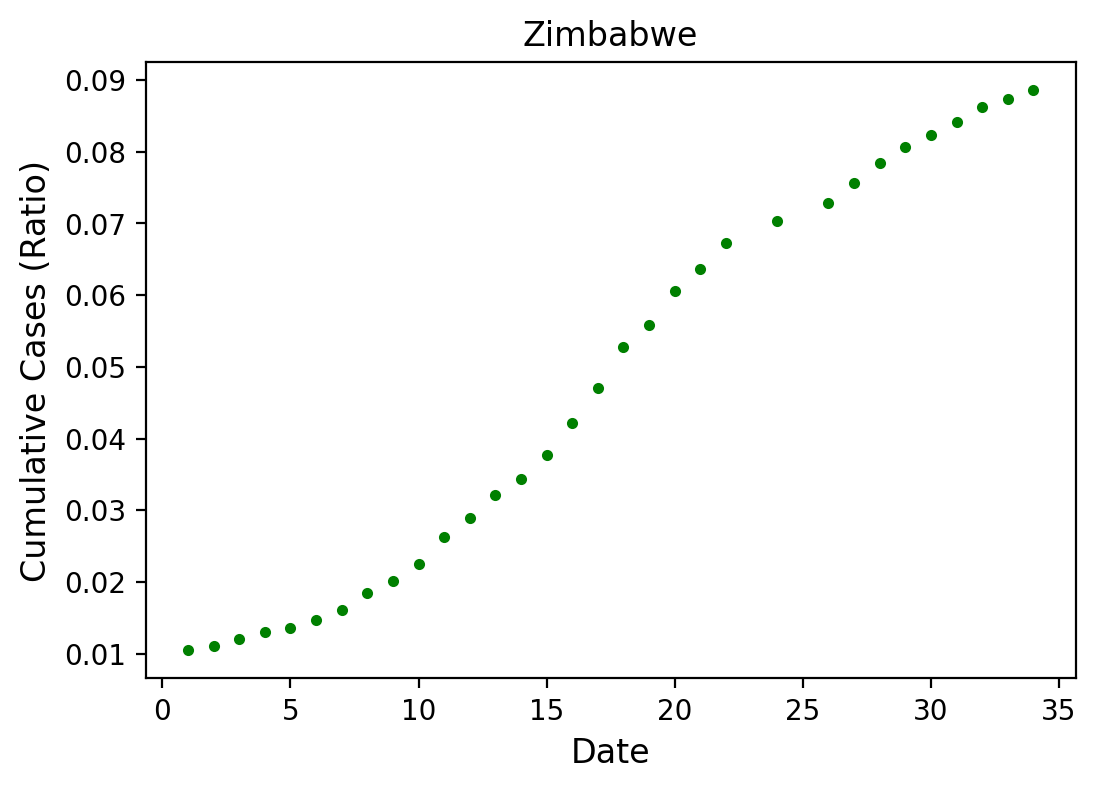

In [36]:
Population_zimb = 350000

data_zimb = data_all[data_all['Zimbabwe'].notnull()]

data_zimb = data_zimb.drop(columns=['Burundi', 'Ethiopia', 'Kenya', 'Comoros',
                                          'Mozambique', 'Somalia', 'Malawi', 'Sudan', 'Zambia'])

data_zimb['Day_new'] = data_zimb['Day']-data_zimb['Day'].min()+1

data_zimb['Date'] = data_zimb['Day_new']//7+1

# print(data_zimb)

data_zimb['Cases (Ratio)'] = data_zimb['Zimbabwe']/Population_zimb

data_zimb = data_zimb.drop(columns=['Day', 'Day_new'])

## Removing first few points:

data_zimb = data_zimb.iloc[25:]

data_zimb['Date']= data_zimb['Date'] - data_zimb['Date'].min() + 1



data_zimb.reset_index(drop=True, inplace=True)

print(data_zimb)

figure(1, [6, 4])
plot(data_zimb['Date'], data_zimb['Cases (Ratio)'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Zimbabwe')

SumSquares= 0.08701754393937056


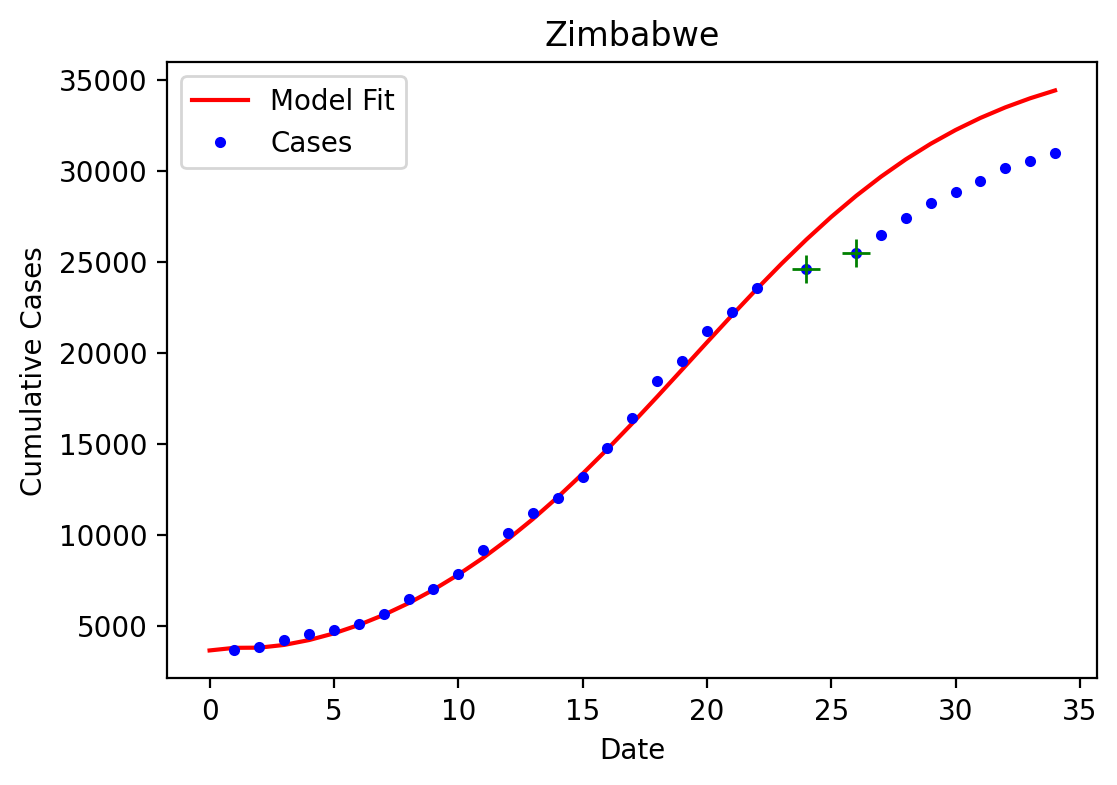

In [97]:
## Zimbabwe

Date = data_zimb['Date']
Outbreak_data = data_zimb['Cases (Ratio)']

burnin = 0

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=0.7
lamb = 2.1
sigma = 0.10
mu = 2*10**(-4)
c=10200/K
r=0.065
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.17     ## Asymptomatic recovery
p_I = 0.96     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic



# dt = 1
# K=600000
# a=0.7
# lamb = 2.1
# sigma = 0.10
# mu = 2*10**(-4)
# c=10200/K
# r=0.065
# c_s = 0.15    ## Sanitary Disposal Compliance
# c_h = 0.20    ## Handwashing compliance
# c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
# c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

# p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

# p_A = 0.1     ## Asymptomatic recovery
# p_I = 1.03     ## Symptomatic recovery
# q_A = 0.2       ## Fecal contamination from asymptomatic
# q_I = 0.5     ## Fecal contamination from symptomatic



I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin+1)
S = np.zeros(max(Date)+burnin+2)
I = np.zeros(max(Date)+burnin+2)
A = np.zeros(max(Date)+burnin+2)
B = np.zeros(max(Date)+burnin+2)
alph= np.zeros(max(Date)+burnin+2)


I[0] = 0.01
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=10500/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin + 1)
CaseDF = np.zeros(max(Date) + burnin + 1)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin+1):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(I, 'r-', label='Model Fit')
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_zimb, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_zimb, 'b.', label='Cases')
plt.plot(24, 24617.0, 'g+', markersize=10)
plt.plot(26, 25494.0, 'g+', markersize=10)
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Zimbabwe')
plt.legend()

As can be seen, there are two consecutive points around week 24 and 26 (green cross points above) that deviate from the excellent model fit encountered for the previous points. This may indicate that there may have been a shortcoming in the case reporting or detecting in those two datapoints. To determine whether this is indeed the case, we adjust the week 27 point to give it a value back on the model trend line, to see whether the subsequent points still follow the model trend. If this is the case, then we conclude that there was some problem with case detection or reporting in those two dates.

    Date     Zimbabwe  Cases (Ratio)
0      1   3652.00000       0.010434
1      2   3856.00000       0.011017
2      3   4199.00000       0.011997
3      4   4538.00000       0.012966
4      5   4753.00000       0.013580
5      6   5125.00000       0.014643
6      7   5651.00000       0.016146
7      8   6479.00000       0.018511
8      9   7028.00000       0.020080
9     10   7865.00000       0.022471
10    11   9197.00000       0.026277
11    12  10127.00000       0.028934
12    13  11221.00000       0.032060
13    14  12044.00000       0.034411
14    15  13199.00000       0.037711
15    16  14767.00000       0.042191
16    17  16445.00000       0.046986
17    18  18465.00000       0.052757
18    19  19545.00000       0.055843
19    20  21223.00000       0.060637
20    21  22276.00000       0.063646
21    22  23549.00000       0.067283
22    27  29623.31822       0.084638
23    28  30575.31822       0.087358
24    29  31394.31822       0.089698
25    30  31980.31822       0.091372
2

<ipython-input-98-31dd7f411c16>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zimb_adj['Cases (Ratio)'] = data_zimb_adj['Cases (Ratio)'] - data_zimb_adj['Cases (Ratio)'][0] + DataFrame['Model'][26]
<ipython-input-98-31dd7f411c16>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zimb_adj['Zimbabwe'] = data_zimb_adj['Zimbabwe'] - data_zimb_adj['Zimbabwe'][0] + DataFrame['Model'][26]*Population_zimb


Text(0.5, 1.0, 'Zimbabwe')

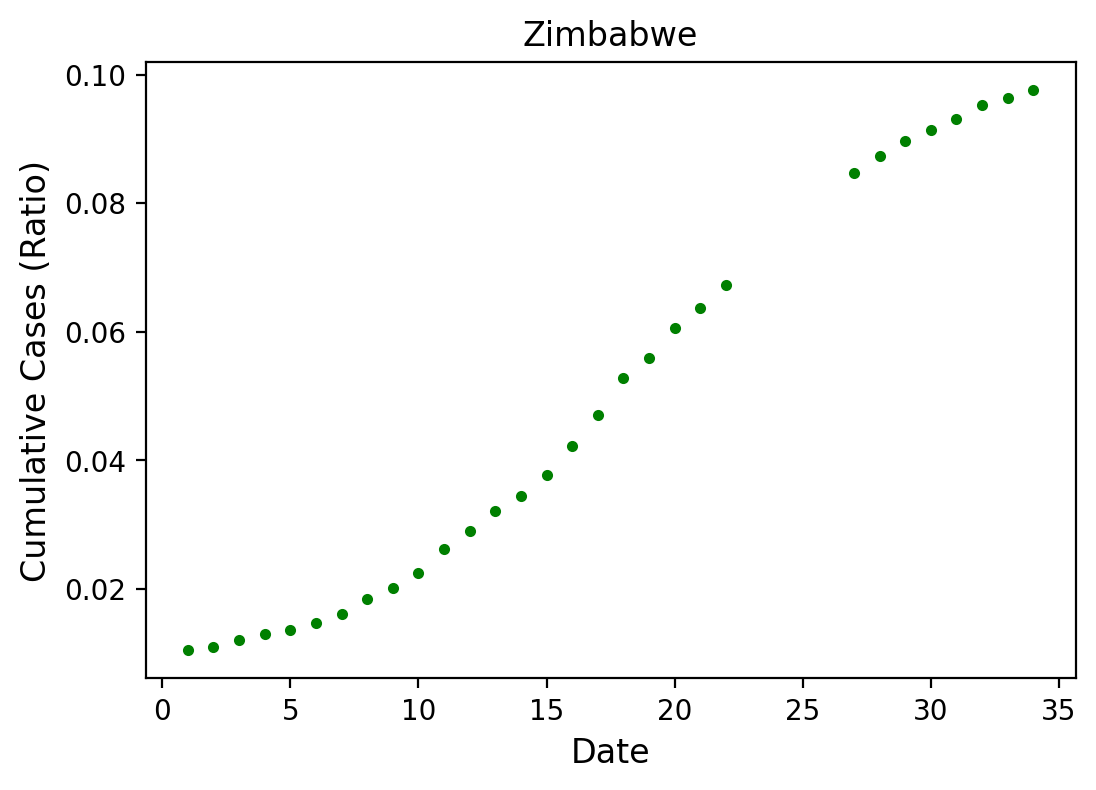

In [98]:
data_zimb_2 = data_zimb.drop([22])

data_zimb_2.reset_index(drop=True, inplace=True)

data_zimb_orig = data_zimb_2[:22]

# print(data_zimb_orig)

data_zimb_adj = data_zimb_2[22:]

data_zimb_adj.reset_index(drop=True, inplace=True)

data_zimb_adj['Cases (Ratio)'] = data_zimb_adj['Cases (Ratio)'] - data_zimb_adj['Cases (Ratio)'][0] + DataFrame['Model'][26]

data_zimb_adj['Zimbabwe'] = data_zimb_adj['Zimbabwe'] - data_zimb_adj['Zimbabwe'][0] + DataFrame['Model'][26]*Population_zimb

# print(data_zimb_adj)

data_zimb_new = pd.concat([data_zimb_orig, data_zimb_adj], ignore_index=True)

data_zimb_new = data_zimb_new.drop([22])

data_zimb_new.reset_index(drop=True, inplace=True)

print(data_zimb_new)


# for i in range(len(data_zimb_adj)):
#   if i <= 21:
#     data_zimb_adj['Zimbabwe'][i] = data_zimb_adj['Zimbabwe'][i]
#     data_zimb_adj['Cases (Ratio)'][i] = data_zimb_adj['Cases (Ratio)'][i]
#   else:
#     data_zimb_adj['Zimbabwe'][i] = data_zimb_adj['Zimbabwe'][i] - data_zimb_adj['Zimbabwe'][22] + DataFrame['Model'][28]*Population_zimb
#     data_zimb_adj['Cases (Ratio)'][i] = data_zimb_adj['Cases (Ratio)'][i] - data_zimb_adj['Cases (Ratio)'][22] + DataFrame['Model'][28]
#     print(data_zimb_adj['Cases (Ratio)'][i] - data_zimb_adj['Cases (Ratio)'][22])

# # print(data_zimb_adj)


figure(1, [6, 4])
plot(data_zimb_new['Date'], data_zimb_new['Cases (Ratio)'], 'g.')
# plot(data_zimb_new['Date'], data_zimb_new['Zimbabwe'], 'g.')
xlabel('Date', fontsize=12)
ylabel('Cumulative Cases (Ratio)', fontsize=12);
title('Zimbabwe')

SumSquares= 0.09000476298886098


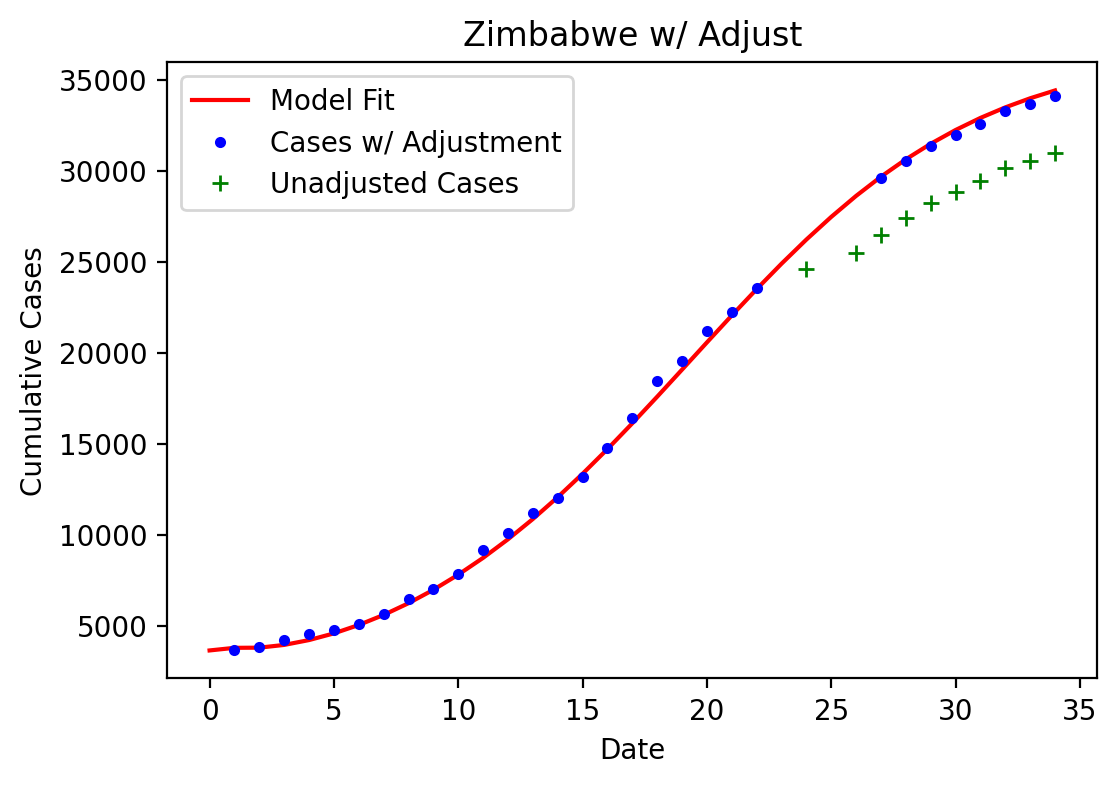

In [99]:
## Zimbabwe with Adjustment

Date = data_zimb_new['Date']
Outbreak_data = data_zimb_new['Cases (Ratio)']

burnin = 0

Ndays = len(Outbreak_data)

dt = 1
K=600000
a=0.7
lamb = 2.1
sigma = 0.10
mu = 2*10**(-4)
c=10200/K
r=0.065
c_s = 0.15    ## Sanitary Disposal Compliance
c_h = 0.20    ## Handwashing compliance
c_f_A = 0.10    ## Fecal disposal compliance for asymptomatic
c_f_I = 0.30    ## Fecal disposal compliance for symptomatic

p_S = 0.5         ## CORRECT? Vaccination rate - CORRECT?

p_A = 0.17     ## Asymptomatic recovery
p_I = 0.96     ## Symptomatic recovery
q_A = 0.2       ## Fecal contamination from asymptomatic
q_I = 0.5     ## Fecal contamination from symptomatic



I_t = range(Ndays+burnin)
MI_t = range(max(Date)+burnin+1)
S = np.zeros(max(Date)+burnin+2)
I = np.zeros(max(Date)+burnin+2)
A = np.zeros(max(Date)+burnin+2)
B = np.zeros(max(Date)+burnin+2)
alph= np.zeros(max(Date)+burnin+2)


I[0] = 0.01
A[0] = I[0]/sigma * (1-sigma)
S[0] = 1-I[0]-A[0]
B[0]=10500/K
alph[0]=a*(B[0]-c)/((B[0]-c)+lamb)

### Instead of Susceptible = ... 1 - p_S*S[n], we put mu instead of 1 and p_S! The original model is incorrect!


for n in MI_t:
    alph[n+1]=np.piecewise(B[n], [B[n] < c, B[n] >= c], [0, a*(B[n]-c)/((B[n]-c)+lamb)])
    S[n+1] = S[n]+(-(1-c_s)*(1-c_h)*alph[n]*S[n] + mu - mu*S[n])*dt
    B[n+1] = B[n]+(r*B[n]*(1-B[n])+(1-c_f_I)*q_I*I[n]+(1-c_f_A)*q_A*A[n])*dt
    I[n+1] = I[n] + dt*(sigma*(1-c_s)*(1-c_h)*alph[n]*S[n]  - p_I*I[n])
    A[n+1] = A[n] + dt*((1-sigma)*(1-c_s)*(1-c_h)*alph[n]*S[n] - p_A*A[n])


DateDF = np.zeros(max(Date) + burnin + 1)
CaseDF = np.zeros(max(Date) + burnin + 1)

for i in MI_t:
  # print(i)
  if i in range(burnin) or i in range(Ndays+burnin, max(Date) + burnin+1):
    # print(i+1)
    DateDF[i] = i+1
    CaseDF[i] = None
  else:
    DateDF[i] = Date[i-burnin]+burnin
    CaseDF[i] = Outbreak_data[i-burnin]
  # else:
  #   DateDF[i] = i+1
  #   CaseDF[i] = None


Sum=0

for n in MI_t:
  for j in I_t:
      #print("Cases=", Cases[j])
      #print("j=", j)
      if n in range(burnin):
        diff = 0
      else:
        if n+1 == DateDF[j]:
            diff=(I[n+1]-CaseDF[j])**2
            Sum=Sum+diff
            # print("Diff=", diff)
        else:
            diff=0
      #print("diff=", diff)

print("SumSquares=", Sum)

# print('CaseDF = ', CaseDF)


DataFrame = pd.DataFrame()
DataFrame['Date'] = DateDF
# DataFrame['Cases'] = Outbreak_data + I[burnin-1]
DataFrame['Cases'] = CaseDF
# DataFrame['Model'] = pd.DataFrame(data=I) + Outbreak_data[0]
DataFrame['Model'] = pd.DataFrame(data=np.cumsum(I)) + Outbreak_data[0] - np.sum(I[0:burnin+1])
# print(DataFrame)

# print('Difference = ', Outbreak_data[0] - (np.cumsum(I) + Outbreak_data[0] - np.sum(I[0:burnin+1])))


figure(1, [6, 4])
# plt.plot(I, 'r-', label='Model Fit')
# plt.plot(np.cumsum(I), 'r-', label='Model Fit')
plt.plot(DataFrame['Model']*Population_zimb, 'r-', label='Model Fit')
plt.plot(DataFrame['Date'], DataFrame['Cases']*Population_zimb, 'b.', label='Cases w/ Adjustment')
plt.plot(data_zimb['Date'][22:], data_zimb['Zimbabwe'][22:], 'g+', markersize=6, label='Unadjusted Cases')
# plt.plot(24, 24617.0, 'g+', markersize=10)
# plt.plot(26, 25494.0, 'g+', markersize=10)
# plt.plot(S, 'b-', label='Susceptible')
plt.ylabel('Cumulative Cases')
plt.xlabel('Date')
plt.title('Zimbabwe w/ Adjust')
plt.legend()